<a href="https://colab.research.google.com/github/MateoGlz/Progra-Analitica-Descriptica-Predictiva/blob/main/_18_Ejercicios_con_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
ruta = '/content/drive/MyDrive/Colab_Notebooks/Airdata.csv'
df = pd.read_csv(ruta)
df.head()

Mounted at /content/drive


DateTime  Temperature  Humidity  Wind_Speed  Wind_Direction  \
0  1/1/2020 0:00     2.180529        87    1.484318       75.963760   
1  1/1/2020 1:00     1.490529        89    2.741678      113.198590   
2  1/1/2020 2:00     1.690529        85    3.563818      135.000000   
3  1/1/2020 3:00     1.430529        84    2.811690      129.805570   
4  1/1/2020 4:00     0.840529        86    1.800000      126.869896   

   NO2_Location_A  NO2_Location_B  NO2_Location_C  
0           39.23           52.88           62.37  
1           38.30           44.95           52.53  
2             NaN           48.40           54.80  
3           37.28           47.18           50.80  
4           29.97           41.48           54.43

In [3]:
print(df.describe())

       Temperature     Humidity   Wind_Speed  Wind_Direction  NO2_Location_A  \
count  8784.000000  8784.000000  8784.000000     8784.000000     8664.000000   
mean     13.110913    66.679417    11.279210      197.595605       22.047992   
std       7.363943    14.871943     8.443103       91.961627       15.597173   
min      -2.789471    20.000000     0.000000        1.218872       -0.460000   
25%       7.360529    56.000000     5.506941      116.565050       10.600000   
50%      12.680529    68.000000     8.891343      206.138925       17.550000   
75%      18.553030    78.000000    14.720416      272.503370       29.300000   
max      33.870530    98.000000    65.446770      360.000000      116.600000   

       NO2_Location_B  NO2_Location_C  
count     8204.000000     8652.000000  
mean        29.000569       45.347931  
std         20.630746       26.735531  
min          0.430000        0.150000  
25%         13.900000       24.030000  
50%         22.750000       40.550000  

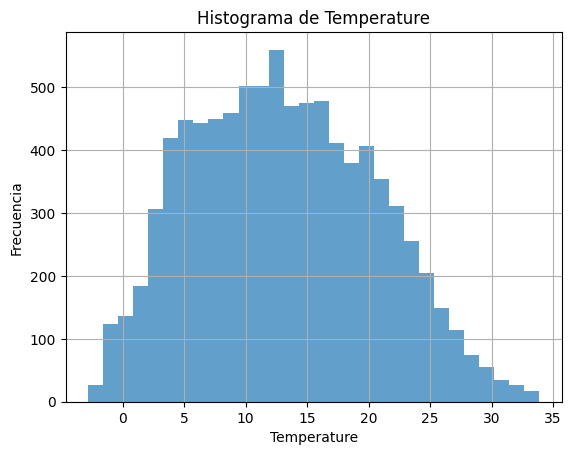

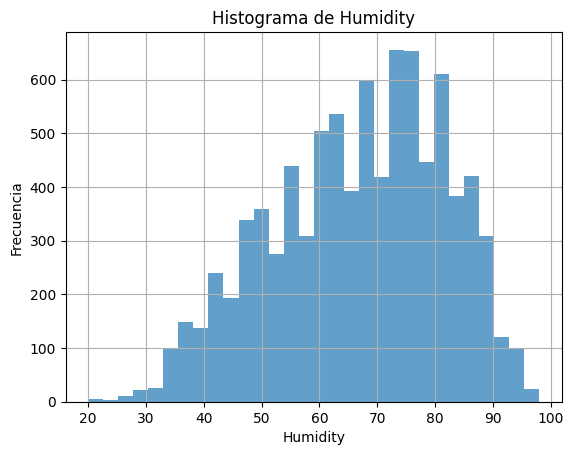

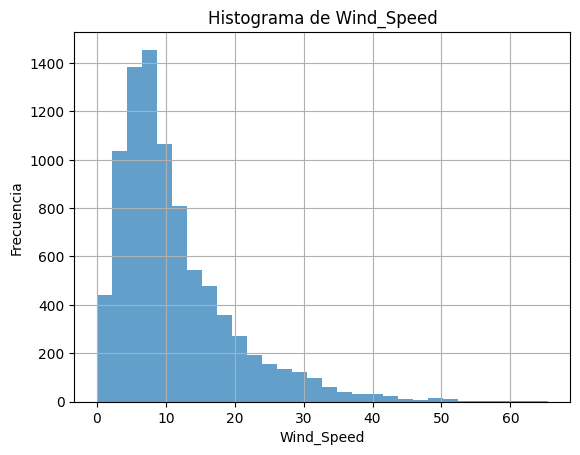

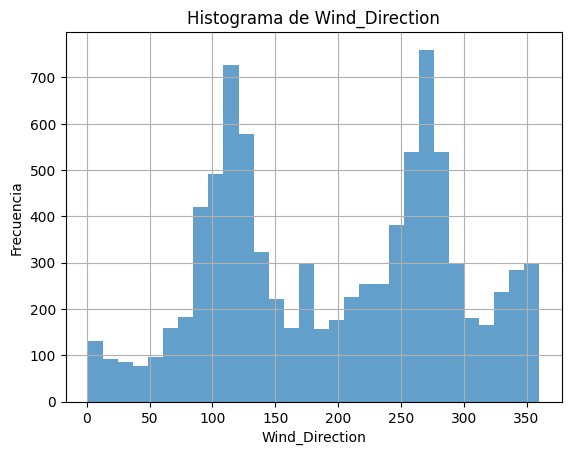

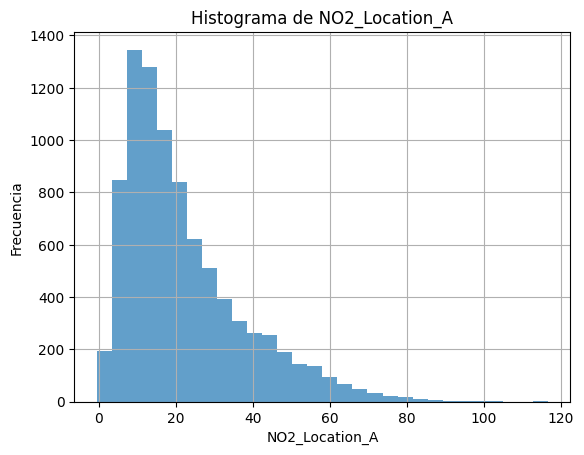

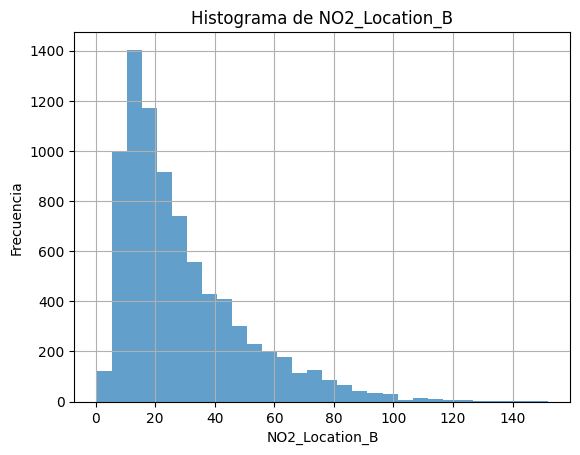

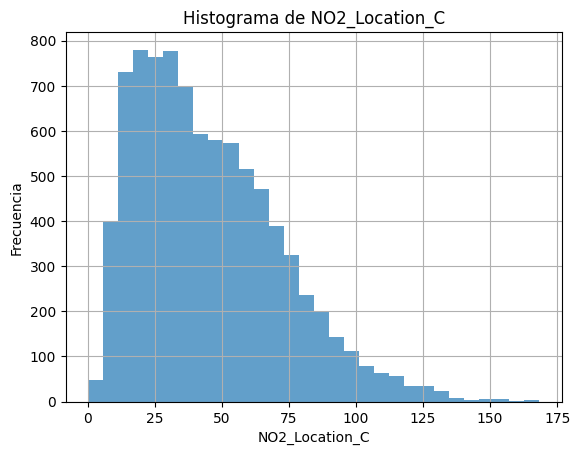

In [4]:
import matplotlib.pyplot as plt

columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for columna in columnas_numericas:
    df[columna].hist(bins=30, alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

📊 Temperature:
   Media: 13.11
   Mediana: 12.68
   Desviación: 7.36
   Sesgo: 0.21
   Forma: casi simétrica (como campana)
--------------------------------------------------


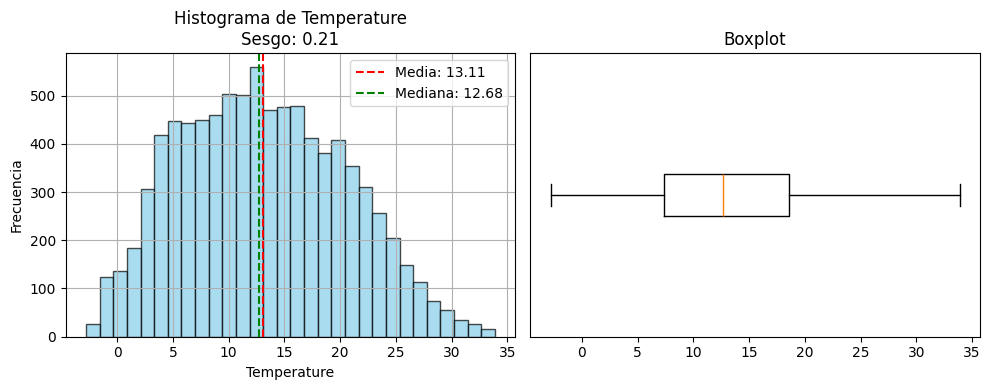



📊 Humidity:
   Media: 66.68
   Mediana: 68.00
   Desviación: 14.87
   Sesgo: -0.33
   Forma: casi simétrica (como campana)
--------------------------------------------------


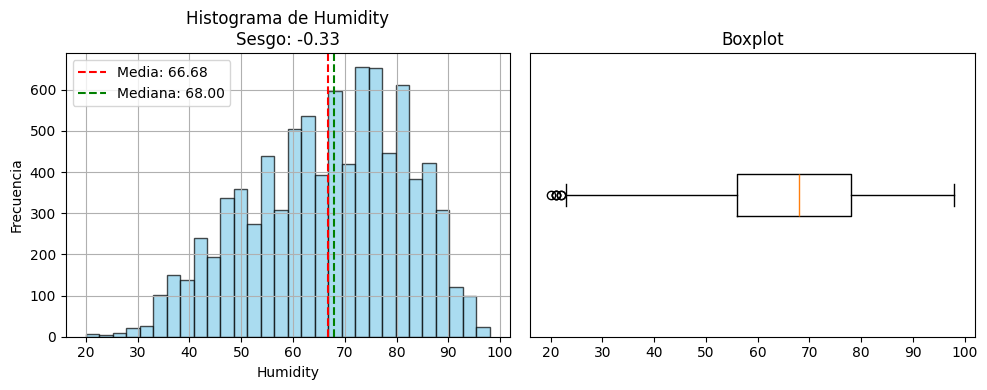



📊 Wind_Speed:
   Media: 11.28
   Mediana: 8.89
   Desviación: 8.44
   Sesgo: 1.72
   Forma: sesgada a la DERECHA (valores altos extremos)
--------------------------------------------------


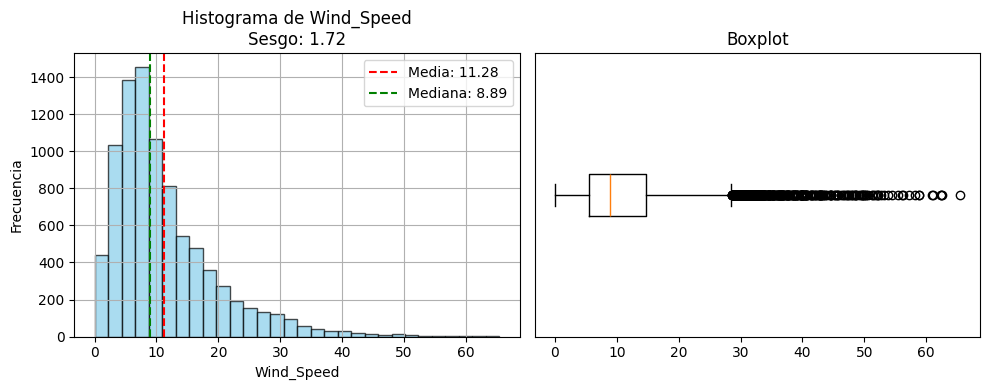



📊 Wind_Direction:
   Media: 197.60
   Mediana: 206.14
   Desviación: 91.96
   Sesgo: -0.07
   Forma: casi simétrica (como campana)
--------------------------------------------------


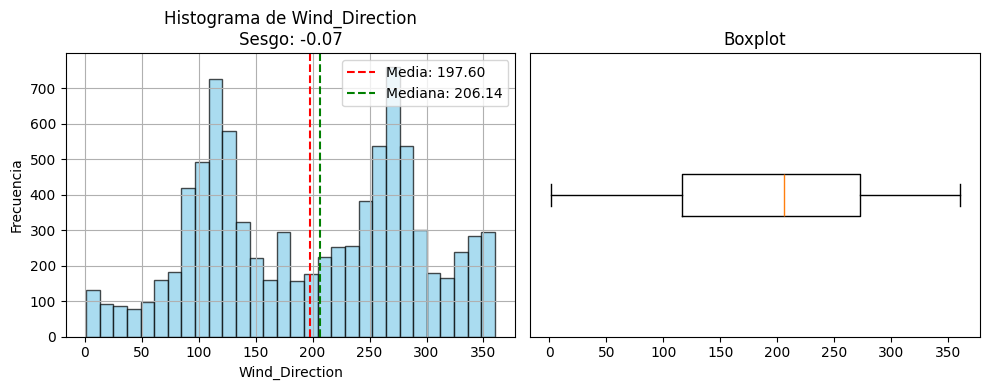



📊 NO2_Location_A:
   Media: 22.05
   Mediana: 17.55
   Desviación: 15.60
   Sesgo: 1.35
   Forma: sesgada a la DERECHA (valores altos extremos)
--------------------------------------------------


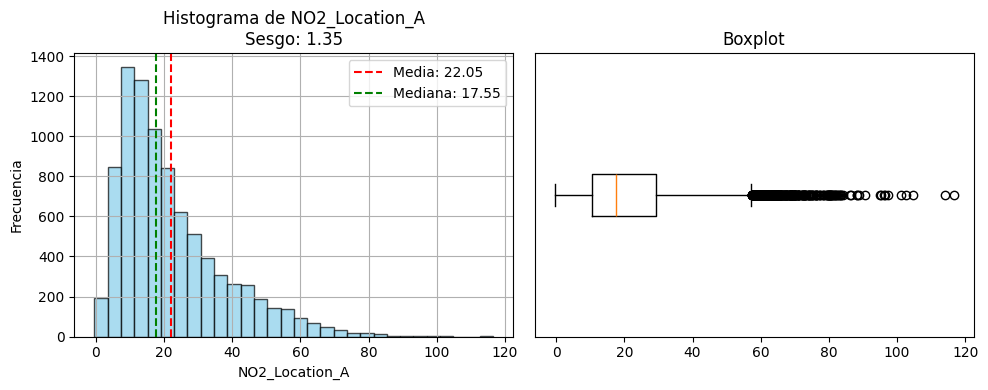



📊 NO2_Location_B:
   Media: 29.00
   Mediana: 22.75
   Desviación: 20.63
   Sesgo: 1.47
   Forma: sesgada a la DERECHA (valores altos extremos)
--------------------------------------------------


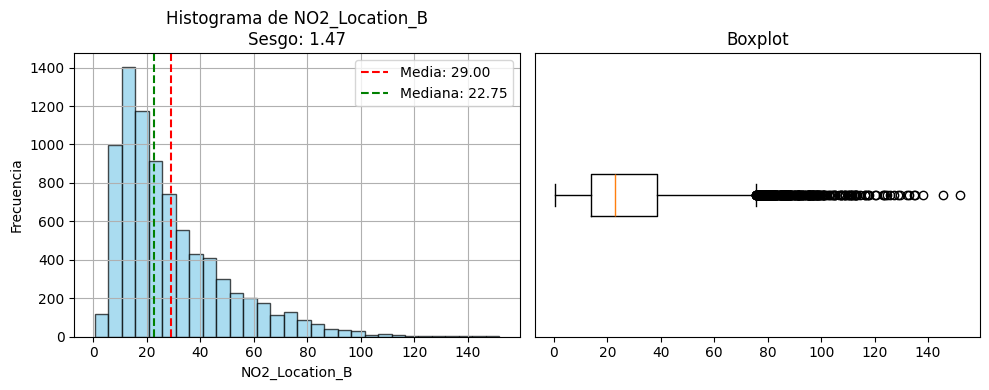



📊 NO2_Location_C:
   Media: 45.35
   Mediana: 40.55
   Desviación: 26.74
   Sesgo: 0.85
   Forma: sesgada a la DERECHA (valores altos extremos)
--------------------------------------------------


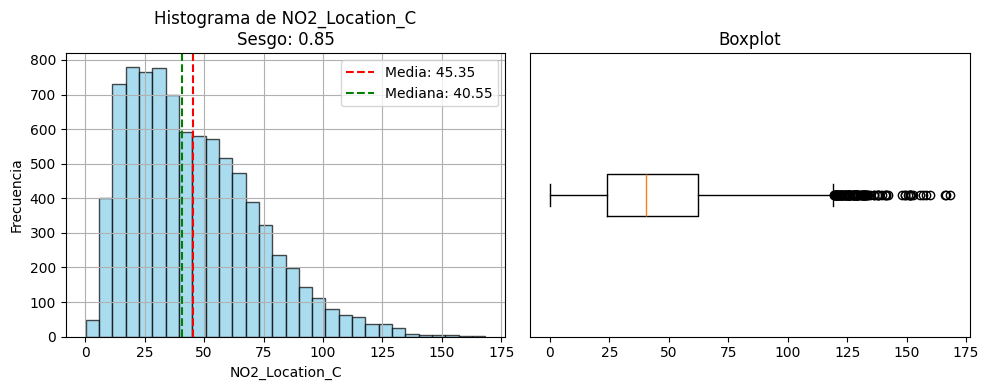

In [5]:
import matplotlib.pyplot as plt
import numpy as np

columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for columna in columnas_numericas:
    # Obtener datos de la columna
    datos = df[columna].dropna()

    # Calcular estadísticas clave
    media = datos.mean()
    mediana = datos.median()
    desviacion = datos.std()
    sesgo = datos.skew()

    # Información de la forma
    print(f"📊 {columna}:")
    print(f"   Media: {media:.2f}")
    print(f"   Mediana: {mediana:.2f}")
    print(f"   Desviación: {desviacion:.2f}")
    print(f"   Sesgo: {sesgo:.2f}")

    # Interpretación básica del sesgo
    if abs(sesgo) < 0.5:
        forma = "casi simétrica (como campana)"
    elif sesgo > 0:
        forma = "sesgada a la DERECHA (valores altos extremos)"
    else:
        forma = "sesgada a la IZQUIERDA (valores bajos extremos)"

    print(f"   Forma: {forma}")

    # Ver diferencia entre media y mediana
    dif_media_mediana = abs(media - mediana)
    if dif_media_mediana > desviacion * 0.5:
        print(f"   ⚠️  Media y mediana difieren mucho → posible efecto de valores extremos")

    print("-" * 50)

    # Histograma
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    datos.hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
    plt.title(f'Histograma de {columna}\nSesgo: {sesgo:.2f}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.boxplot(datos, vert=False)
    plt.title('Boxplot')
    plt.yticks([])

    plt.tight_layout()
    plt.show()
    print("\n")

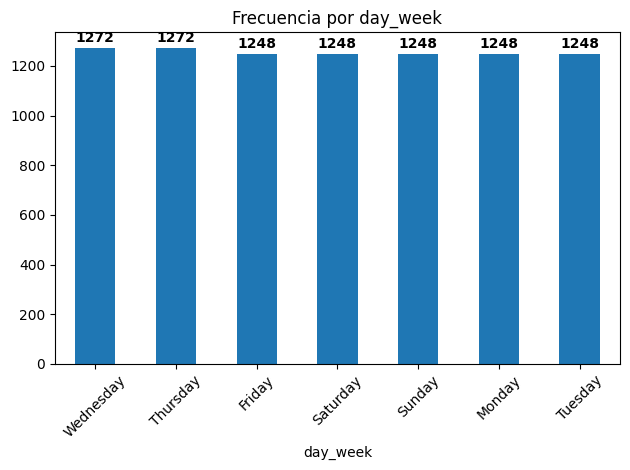

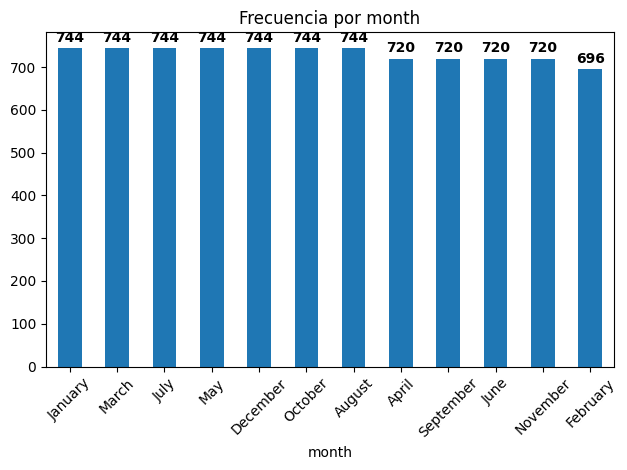

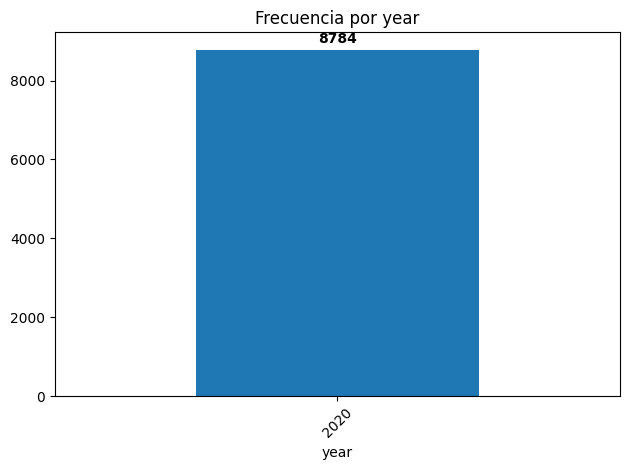

In [6]:
# Crear las columnas temporales automáticamente
df['date'] = pd.to_datetime(df['DateTime'])
df['day_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

# Gráficas para las nuevas columnas categóricas
for columna in ['day_week', 'month', 'year']:
    counts = df[columna].value_counts()
    ax = counts.plot(kind='bar')
    plt.title(f'Frecuencia por {columna}')
    plt.xticks(rotation=45)

    # Añadir las cantidades en las barras
    for i, v in enumerate(counts):
        ax.text(i, v + 0.01 * counts.max(), str(v),
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-4269173364.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(df[columna].dropna(),
/tmp/ipython-input-4269173364.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(df[columna].dropna(),
/tmp/ipython-input-4269173364.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(df[columna].dropna(),
/tmp/ipython-input-4269173364.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(df

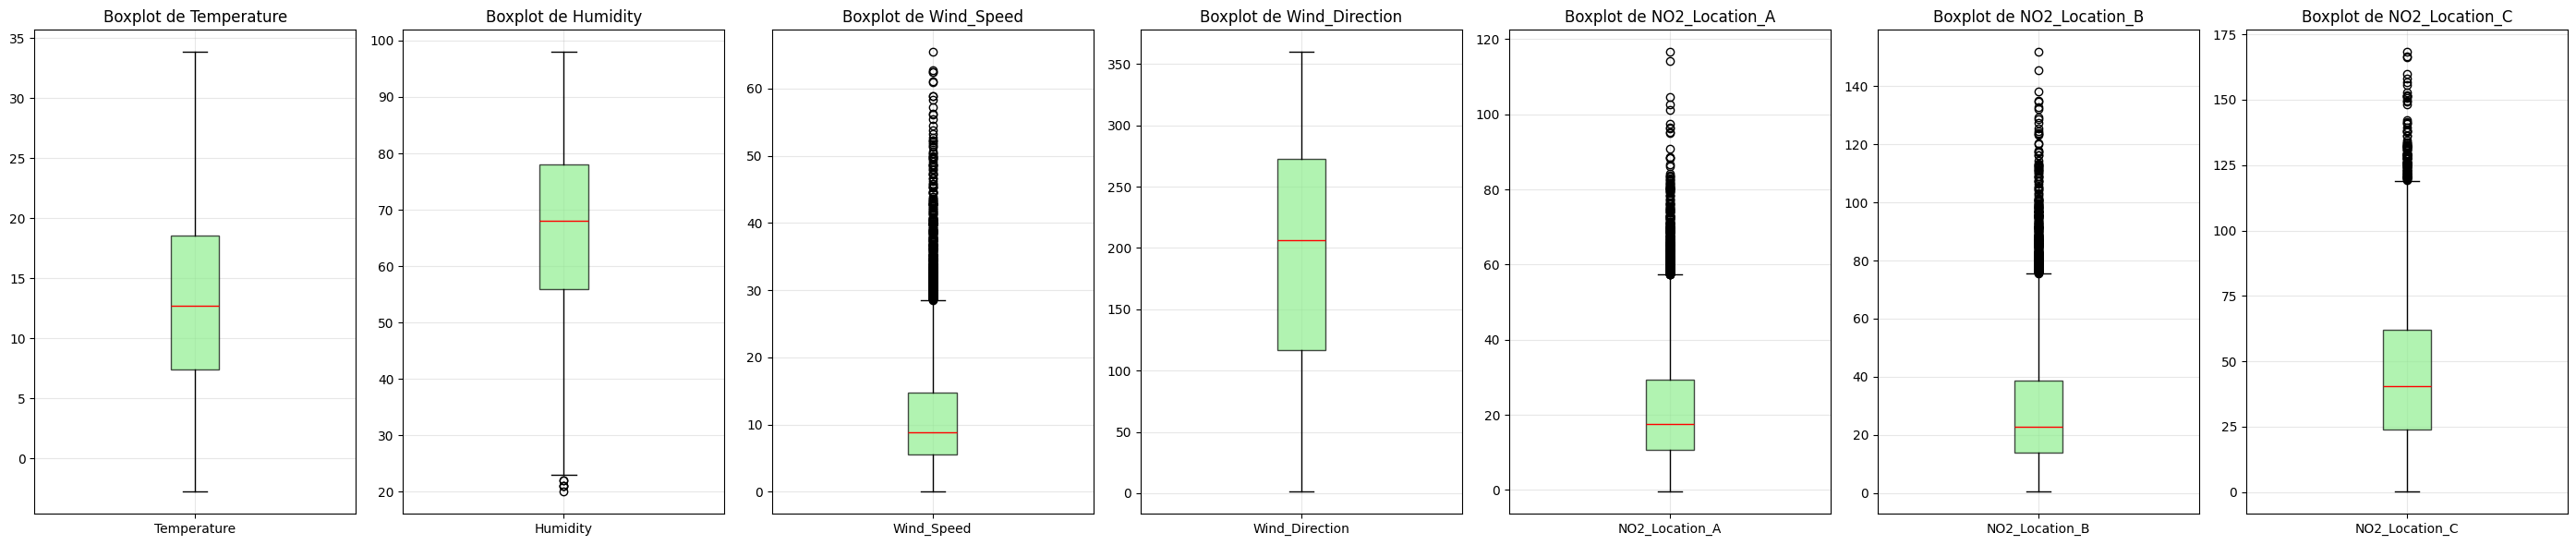

In [7]:
n_cols = len(columnas_numericas)

fig, axes = plt.subplots(1, n_cols, figsize=(4*n_cols, 6))

if n_cols == 1:
    axes = [axes]

for i, columna in enumerate(columnas_numericas):
    boxplot = axes[i].boxplot(df[columna].dropna(),
                            patch_artist=True,
                            showfliers=True,
                            labels=[columna])

    boxplot['boxes'][0].set_facecolor('lightgreen')
    boxplot['boxes'][0].set_alpha(0.7)
    boxplot['medians'][0].set_color('red')

    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Matriz de Correlación:
                Temperature  Humidity  Wind_Speed  Wind_Direction  \
Temperature           1.000    -0.514      -0.144           0.016   
Humidity             -0.514     1.000      -0.033           0.095   
Wind_Speed           -0.144    -0.033       1.000           0.211   
Wind_Direction        0.016     0.095       0.211           1.000   
NO2_Location_A       -0.147     0.048       0.012          -0.006   
NO2_Location_B       -0.171     0.024       0.088           0.046   
NO2_Location_C       -0.027    -0.067       0.024          -0.022   

                NO2_Location_A  NO2_Location_B  NO2_Location_C  
Temperature             -0.147          -0.171          -0.027  
Humidity                 0.048           0.024          -0.067  
Wind_Speed               0.012           0.088           0.024  
Wind_Direction          -0.006           0.046          -0.022  
NO2_Location_A           1.000           0.820           0.617  
NO2_Location_B           0.820    

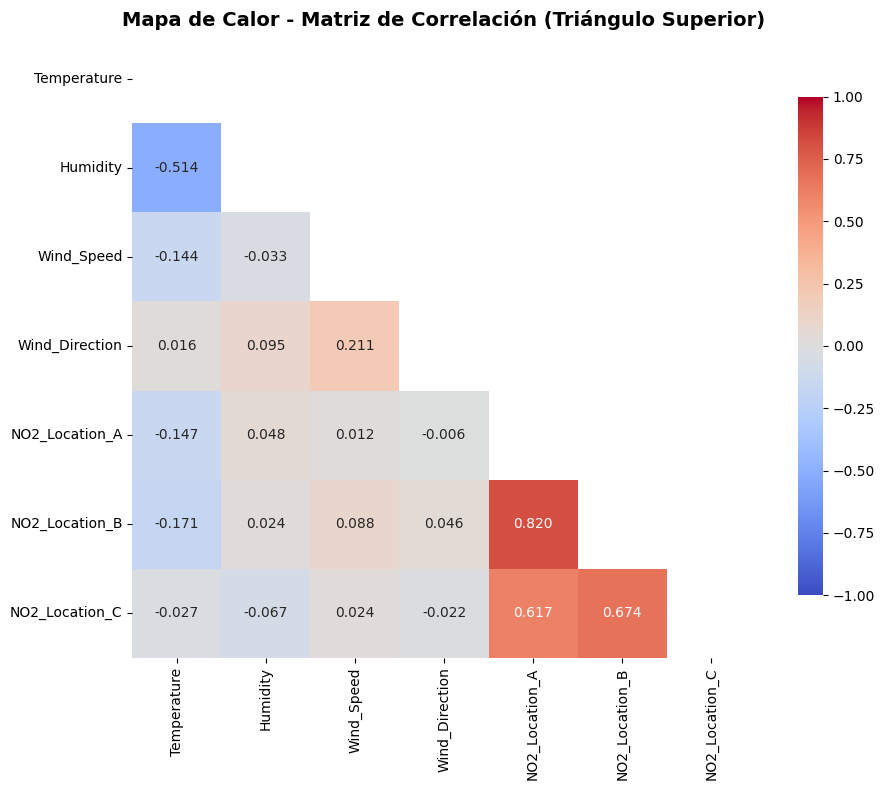

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[columnas_numericas].corr()

print("Matriz de Correlación:")
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            fmt='.3f',
            mask=mask,
            cbar_kws={'shrink': 0.8})

plt.title('Mapa de Calor - Matriz de Correlación (Triángulo Superior)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

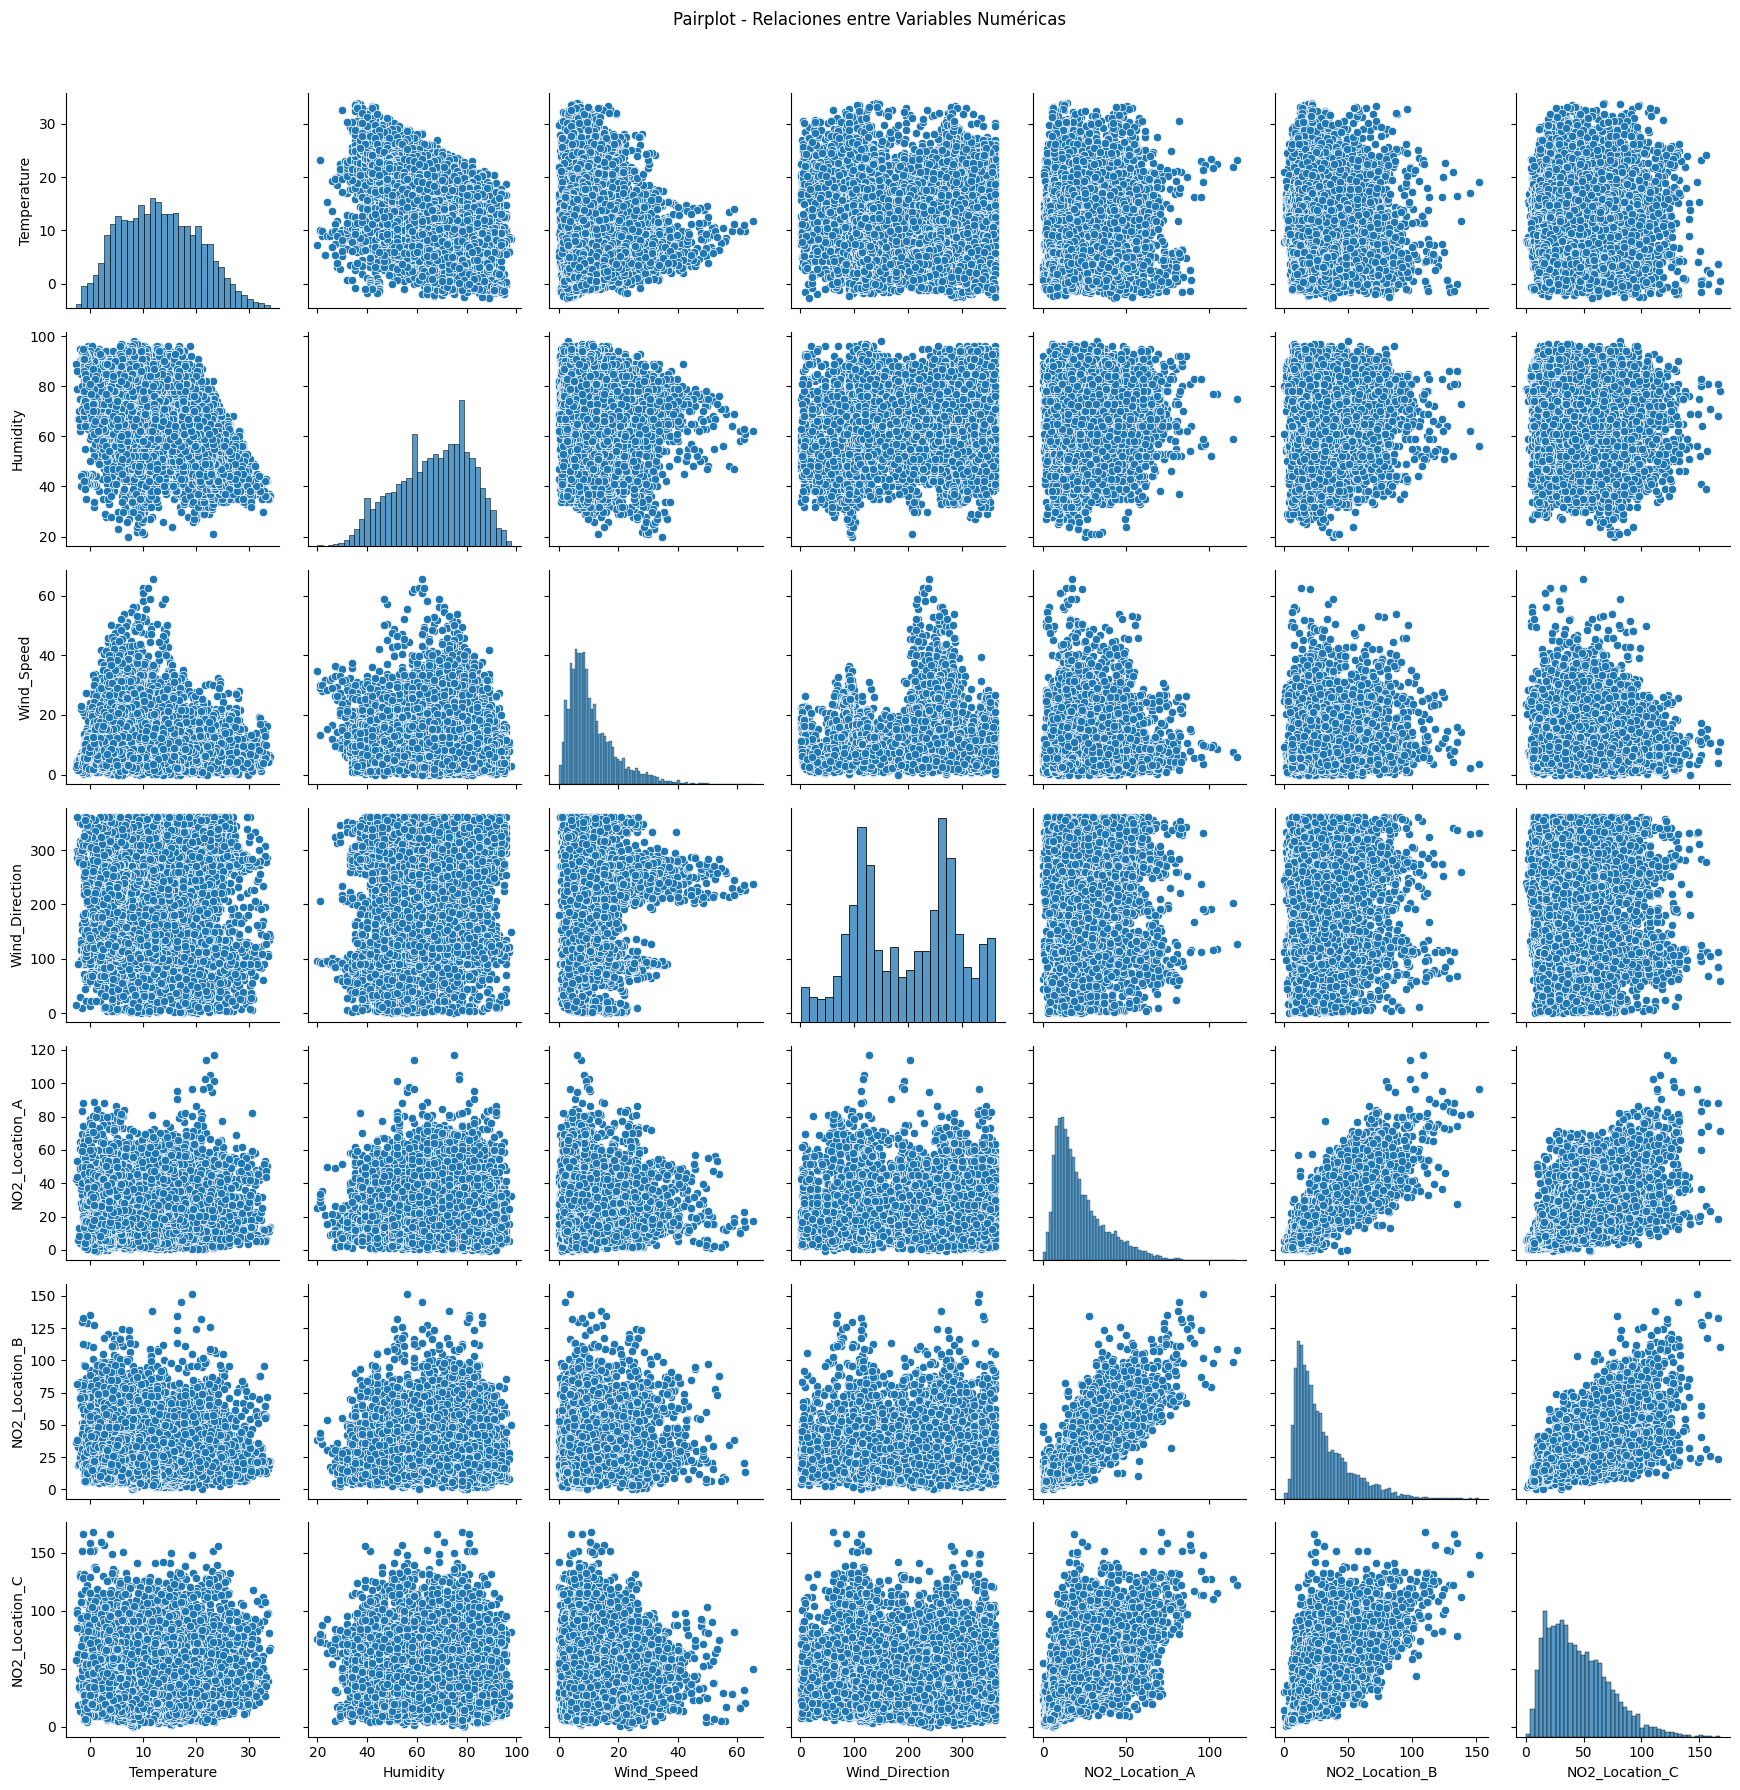

In [9]:

sns.pairplot(df[columnas_numericas])
plt.suptitle('Pairplot - Relaciones entre Variables Numéricas', y=1.02)
plt.tight_layout()
plt.show()

 PRUEBAS DE NORMALIDAD

 VARIABLE: Temperature
   Muestra: 8784 datos | Media: 13.11 | Desv: 7.36
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 26.7081 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8784.
  res = hypotest_fun_out(*samples, **kwds)


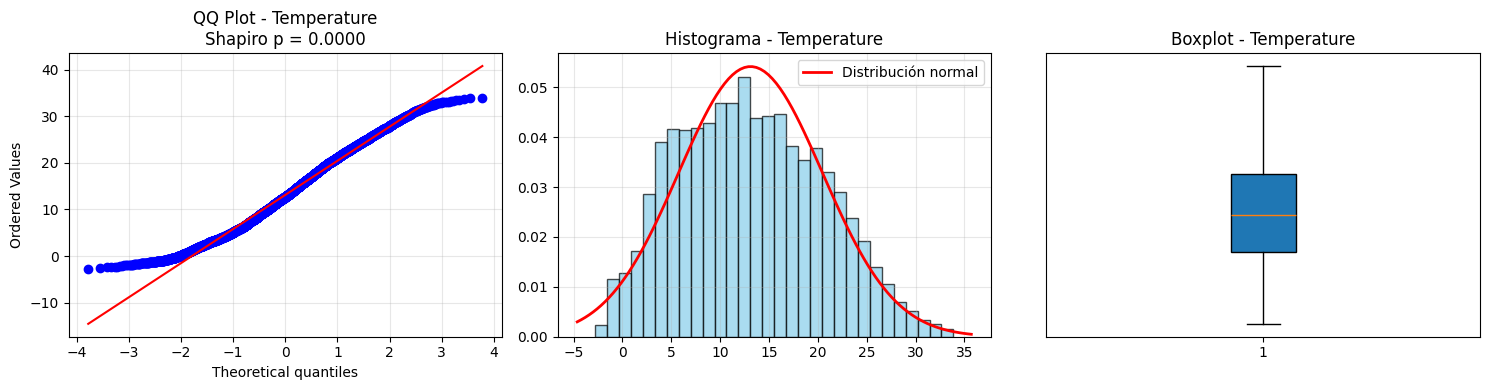


 VARIABLE: Humidity
   Muestra: 8784 datos | Media: 66.68 | Desv: 14.87
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 52.1599 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8784.
  res = hypotest_fun_out(*samples, **kwds)


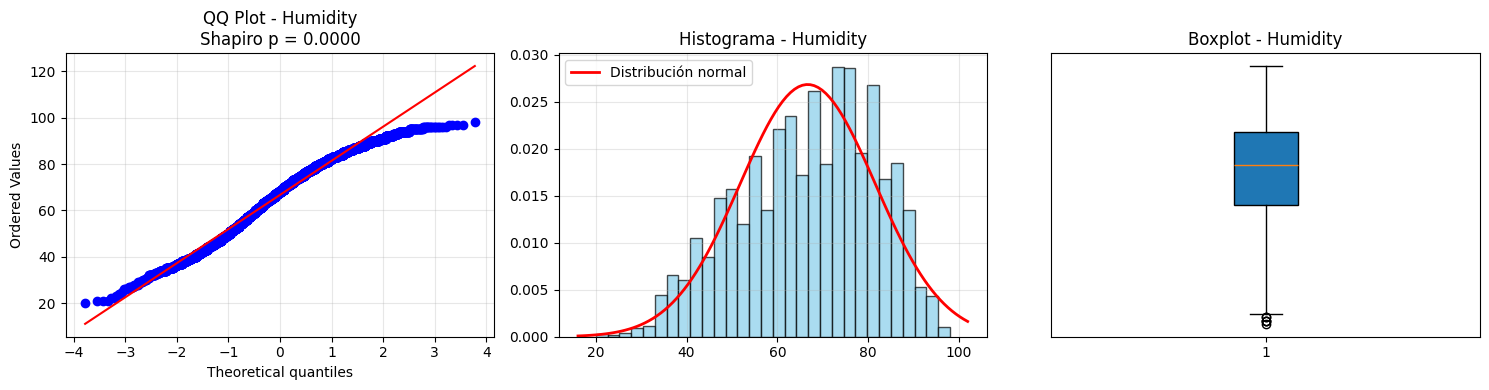


 VARIABLE: Wind_Speed
   Muestra: 8784 datos | Media: 11.28 | Desv: 8.44
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 325.0822 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8784.
  res = hypotest_fun_out(*samples, **kwds)


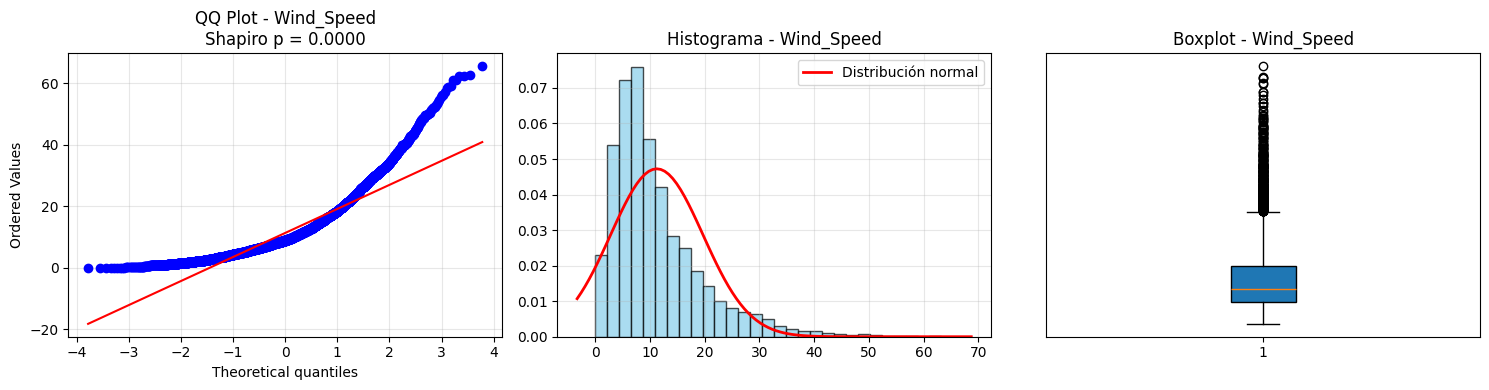


 VARIABLE: Wind_Direction
   Muestra: 8784 datos | Media: 197.60 | Desv: 91.96
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 156.1271 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8784.
  res = hypotest_fun_out(*samples, **kwds)


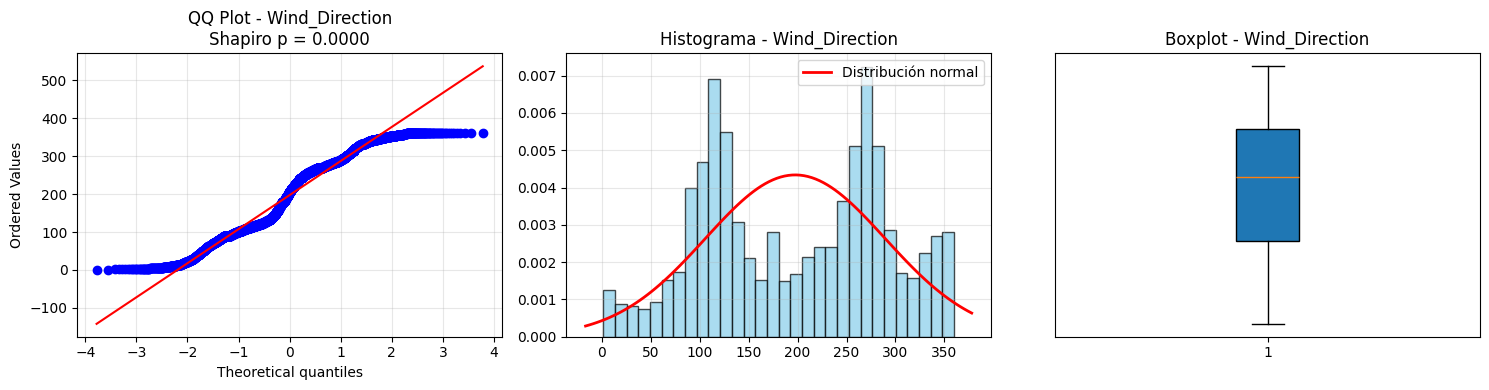


 VARIABLE: NO2_Location_A
   Muestra: 8664 datos | Media: 22.05 | Desv: 15.60
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 287.8880 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8664.
  res = hypotest_fun_out(*samples, **kwds)


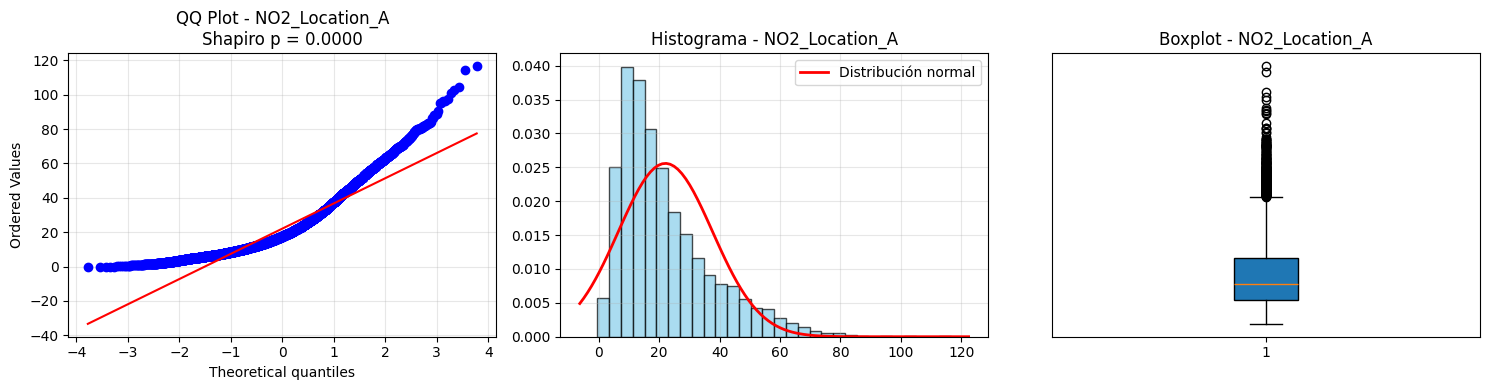


 VARIABLE: NO2_Location_B
   Muestra: 8204 datos | Media: 29.00 | Desv: 20.63
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 308.6407 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8204.
  res = hypotest_fun_out(*samples, **kwds)


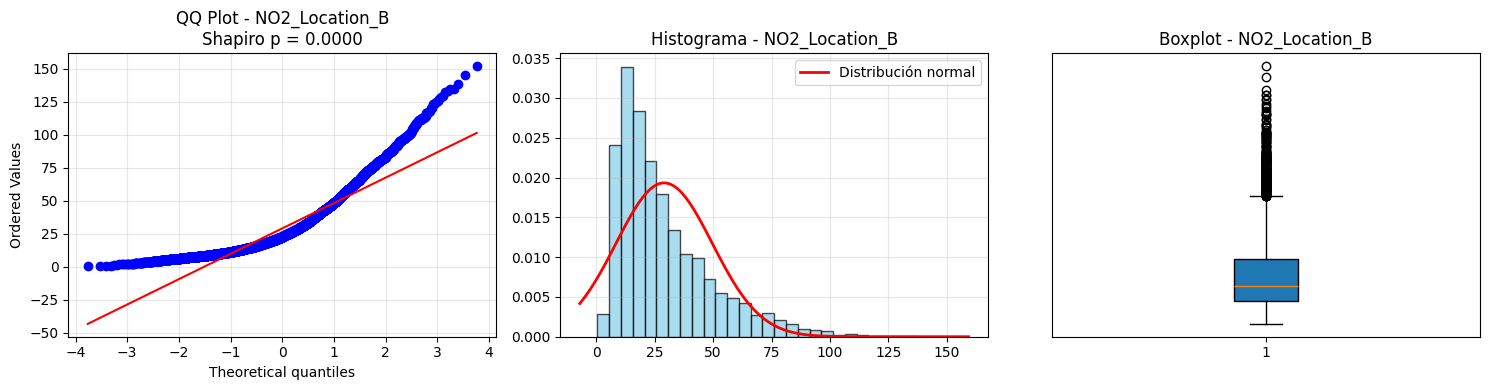


 VARIABLE: NO2_Location_C
   Muestra: 8652 datos | Media: 45.35 | Desv: 26.74
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 110.0108 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8652.
  res = hypotest_fun_out(*samples, **kwds)


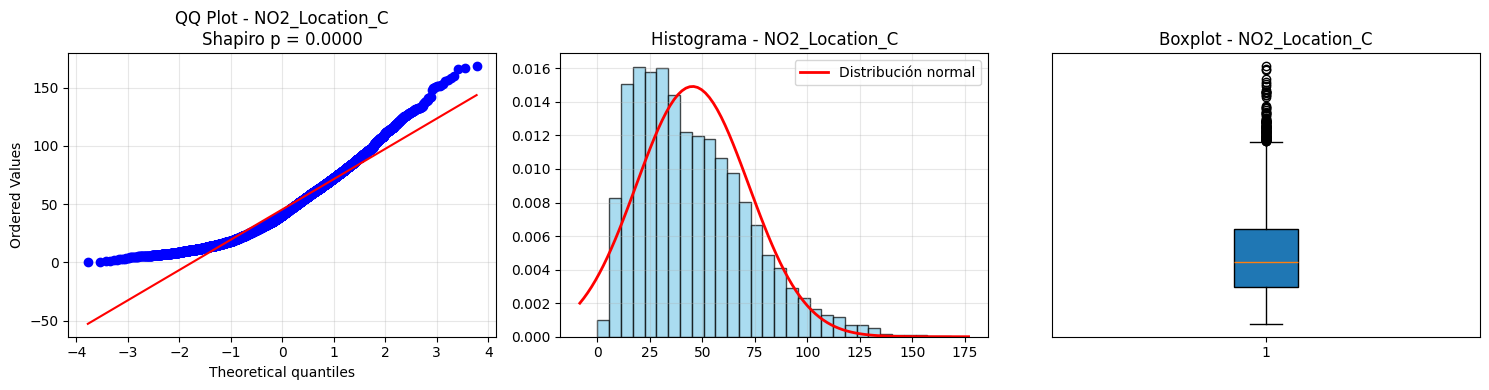


🎯 RESUMEN DE NORMALIDAD:
✅ = Distribución normal (p > 0.05)
❌ = Distribución no normal (p ≤ 0.05)
--------------------------------------------------
❌ Temperature: p = 0.000000
❌ Humidity: p = 0.000000
❌ Wind_Speed: p = 0.000000
❌ Wind_Direction: p = 0.000000
❌ NO2_Location_A: p = 0.000000
❌ NO2_Location_B: p = 0.000000
❌ NO2_Location_C: p = 0.000000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8784.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8664.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8204.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8652.
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
from scipy import stats
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Columnas numéricas para pruebas de normalidad
columnas_numericas = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction',
                     'NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']

print(" PRUEBAS DE NORMALIDAD")
print("=" * 70)

for columna in columnas_numericas:
    # Limpiar datos (eliminar NaN)
    data = df[columna].dropna()

    print(f"\n VARIABLE: {columna}")
    print(f"   Muestra: {len(data)} datos | Media: {data.mean():.2f} | Desv: {data.std():.2f}")
    print("-" * 50)

    # 1. Shapiro-Wilk (mejor para muestras < 5000)
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"• Shapiro-Wilk:    p = {shapiro_p:.6f} | {'✅ Normal' if shapiro_p > 0.05 else '❌ No normal'}")

    # 2. Kolmogorov-Smirnov
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"• Kolmogorov-Smirnov: p = {ks_p:.6f} | {'✅ Normal' if ks_p > 0.05 else '❌ No normal'}")

    # 3. Anderson-Darling (más sensible a colas)
    anderson_result = stats.anderson(data, dist='norm')
    print(f"• Anderson-Darling:  stat = {anderson_result.statistic:.4f} | ", end='')

    # Comparar con valor crítico al 5%
    critical_5 = anderson_result.critical_values[2]  # Valor crítico al 5%
    if anderson_result.statistic < critical_5:
        print(f"✅ Normal (stat < {critical_5:.4f})")
    else:
        print(f"❌ No normal (stat >= {critical_5:.4f})")

    # Crear gráficos de diagnóstico
    plt.figure(figsize=(15, 4))

    # Subplot 1: QQ Plot
    plt.subplot(1, 3, 1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot - {columna}\nShapiro p = {shapiro_p:.4f}')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Histograma + curva normal
    plt.subplot(1, 3, 2)
    plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data.mean(), data.std())
    plt.plot(x, p, 'r-', linewidth=2, label='Distribución normal')
    plt.title(f'Histograma - {columna}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Subplot 3: Boxplot para ver outliers
    plt.subplot(1, 3, 3)
    plt.boxplot(data, patch_artist=True)
    plt.gca().get_yaxis().set_visible(False)  # Ocultar eje Y
    plt.title(f'Boxplot - {columna}')

    plt.tight_layout()
    plt.show()

    print("=" * 70)

# Resumen final
print("\n🎯 RESUMEN DE NORMALIDAD:")
print("✅ = Distribución normal (p > 0.05)")
print("❌ = Distribución no normal (p ≤ 0.05)")
print("-" * 50)

for columna in columnas_numericas:
    data = df[columna].dropna()
    shapiro_stat, shapiro_p = stats.shapiro(data)
    es_normal = "✅" if shapiro_p > 0.05 else "❌"
    print(f"{es_normal} {columna}: p = {shapiro_p:.6f}")

🔍 CAMPOS NULOS POR COLUMNA:
         Campo  Nulos  Porcentaje
NO2_Location_B    580    6.602914
NO2_Location_C    132    1.502732
NO2_Location_A    120    1.366120
      DateTime      0    0.000000
    Wind_Speed      0    0.000000
      Humidity      0    0.000000
   Temperature      0    0.000000
Wind_Direction      0    0.000000
          date      0    0.000000
      day_week      0    0.000000
         month      0    0.000000
          year      0    0.000000

📊 RESUMEN GENERAL:
Total de registros: 8784
Columnas con nulos: 3
Columnas sin nulos: 9


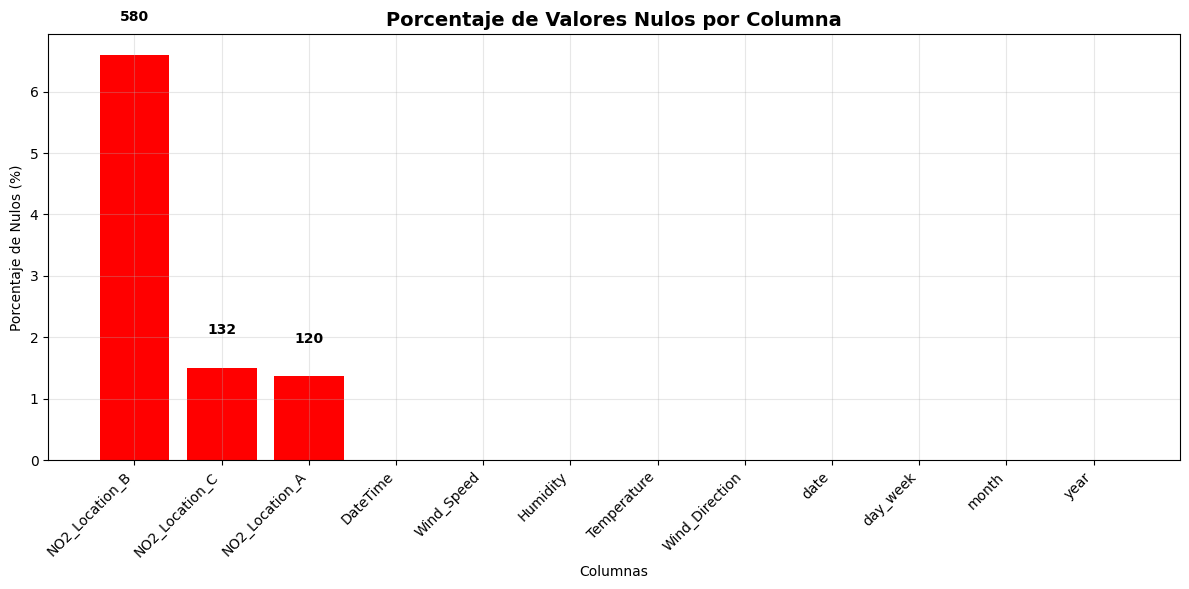


⚠️  COLUMNAS CON VALORES NULOS:
• NO2_Location_B: 580 nulos (6.60%)
• NO2_Location_C: 132 nulos (1.50%)
• NO2_Location_A: 120 nulos (1.37%)


In [11]:
# Ver campos nulos de cada columna
print("🔍 CAMPOS NULOS POR COLUMNA:")
print("=" * 50)

nulos = df.isnull().sum()
nulos_porcentaje = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame con la información
resumen_nulos = pd.DataFrame({
    'Campo': nulos.index,
    'Nulos': nulos.values,
    'Porcentaje': nulos_porcentaje.values
})

# Ordenar de mayor a menor
resumen_nulos = resumen_nulos.sort_values('Nulos', ascending=False)

# Mostrar resultados
print(resumen_nulos.to_string(index=False))

print("\n📊 RESUMEN GENERAL:")
print(f"Total de registros: {len(df)}")
print(f"Columnas con nulos: {len(resumen_nulos[resumen_nulos['Nulos'] > 0])}")
print(f"Columnas sin nulos: {len(resumen_nulos[resumen_nulos['Nulos'] == 0])}")

# Gráfico de nulos
plt.figure(figsize=(12, 6))
bars = plt.bar(resumen_nulos['Campo'], resumen_nulos['Porcentaje'],
               color=['red' if x > 0 else 'green' for x in resumen_nulos['Nulos']])
plt.title('Porcentaje de Valores Nulos por Columna', fontsize=14, fontweight='bold')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Añadir etiquetas con los valores
for bar, nulo in zip(bars, resumen_nulos['Nulos']):
    if nulo > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{nulo}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Versión más detallada para columnas con nulos
if len(resumen_nulos[resumen_nulos['Nulos'] > 0]) > 0:
    print("\n⚠️  COLUMNAS CON VALORES NULOS:")
    print("=" * 40)
    columnas_con_nulos = resumen_nulos[resumen_nulos['Nulos'] > 0]
    for _, row in columnas_con_nulos.iterrows():
        print(f"• {row['Campo']}: {row['Nulos']} nulos ({row['Porcentaje']:.2f}%)")
else:
    print("✅ No hay columnas con valores nulos")

In [12]:
# Variables a analizar
variables_clima = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

print("📊 LÍMITES RECOMENDADOS:")
print("=" * 40)

for variable in variables_clima:
    data = df[variable].dropna()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)

    if variable == 'Temperature':
        limite = max(std * 0.1, 0.5)
    elif variable == 'Humidity':
        limite = max(std * 0.1, 2.0)
    elif variable == 'Wind_Speed':
        limite = max(std * 0.1, 0.5)
    elif variable == 'Wind_Direction':
        limite = max(std * 0.1, 5.0)

    print(f"{variable}: ±{limite:.1f}")

📊 LÍMITES RECOMENDADOS:
Temperature: ±0.7
Humidity: ±2.0
Wind_Speed: ±0.8
Wind_Direction: ±9.2


In [13]:
limites_calculados = {}
for columna in ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction',
                'NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']:
    q25 = df[columna].quantile(0.25)
    q50 = df[columna].quantile(0.50)
    diferencia = abs(q50 - q25)
    limites_calculados[columna] = round(diferencia * 0.25, 1)  # 50% de la diferencia

print("📊 LÍMITES CALCULADOS AUTOMÁTICAMENTE:")
for var, lim in limites_calculados.items():
    print(f"{var}: ±{lim}")

📊 LÍMITES CALCULADOS AUTOMÁTICAMENTE:
Temperature: ±1.3
Humidity: ±3.0
Wind_Speed: ±0.8
Wind_Direction: ±22.4
NO2_Location_A: ±1.7
NO2_Location_B: ±2.2
NO2_Location_C: ±4.1


In [14]:
# Calcular diferencias reales entre percentiles
print("📊 DIFERENCIAS REALES ENTRE PERCENTILES:")
print("=" * 50)

for columna in ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']:
    q25 = df[columna].quantile(0.25)
    q50 = df[columna].quantile(0.50)
    diferencia_real = abs(q50 - q25)

    print(f"{columna}:")
    print(f"  Q25: {q25:.1f}")
    print(f"  Q50: {q50:.1f}")
    print(f"  Diferencia real: {diferencia_real:.1f}")
    print(f"  25% de diferencia: {diferencia_real * 0.25:.1f}")
    print(f"  50% de diferencia: {diferencia_real * 0.5:.1f}")
    print()

📊 DIFERENCIAS REALES ENTRE PERCENTILES:
Temperature:
  Q25: 7.4
  Q50: 12.7
  Diferencia real: 5.3
  25% de diferencia: 1.3
  50% de diferencia: 2.7

Humidity:
  Q25: 56.0
  Q50: 68.0
  Diferencia real: 12.0
  25% de diferencia: 3.0
  50% de diferencia: 6.0

Wind_Speed:
  Q25: 5.5
  Q50: 8.9
  Diferencia real: 3.4
  25% de diferencia: 0.8
  50% de diferencia: 1.7

Wind_Direction:
  Q25: 116.6
  Q50: 206.1
  Diferencia real: 89.6
  25% de diferencia: 22.4
  50% de diferencia: 44.8



In [15]:
# Usar 25% para mayor precisión
limites_precisos = {
    'Temperature': 1.3,      # ±1.3°C
    'Humidity': 3.0,         # ±3%
    'Wind_Speed': 0.8,       # ±0.8 m/s
    'Wind_Direction': 22.4   # ±22.4°
}
contador = 0

print("📊 LÍMITES PRECISOS (25% de diferencia):")
for var, lim in limites_precisos.items():
    print(f"{var}: ±{lim}")

# Función para imputar mostrando ejemplos detallados
def imputar_y_mostrar_ejemplos(df, columna_nulos, variables_match, tolerancias):
    df_temp = df.copy()
    nulos_original = df_temp[columna_nulos].isna().sum()
    imputados = 0

    print(f"\n🔄 IMPUTANDO {columna_nulos}")
    print(f"Registros nulos iniciales: {nulos_original}")
    print("-" * 60)

    for idx in df_temp[df_temp[columna_nulos].isna()].index:
        valores_target = df_temp.loc[idx, variables_match]

        # Buscar registros similares
        mascara_similar = df_temp[columna_nulos].notna()
        for var in variables_match:
            tolerancia = tolerancias[var]
            mascara_similar = mascara_similar & (
                abs(df_temp[var] - valores_target[var]) <= tolerancia
            )

        if mascara_similar.any():
            matches = df_temp.loc[mascara_similar]
            valor_imputar = matches[columna_nulos].mean()

            # Mostrar ejemplo detallado
            print(f"\n✅ Registro {idx} IMPUTADO:")
            print(f"   Valor imputado: {valor_imputar:.2f}")
            print(f"   Registros similares encontrados: {len(matches)}")

            # Mostrar el primer match como ejemplo
            match_idx = matches.index[0]
            print(f"   Ejemplo del registro usado (idx {match_idx}):")
            for var in variables_match:
                diff = abs(df_temp.loc[match_idx, var] - valores_target[var])
                print(f"     {var}: Target={valores_target[var]:.1f}, Match={df_temp.loc[match_idx, var]:.1f}, Diff={diff:.1f}")

            df_temp.loc[idx, columna_nulos] = valor_imputar
            imputados += 1

    nulos_final = df_temp[columna_nulos].isna().sum()
    print(f"\n📊 RESUMEN {columna_nulos}:")
    print(f"   Nulos antes: {nulos_original}")
    print(f"   Nulos después: {nulos_final}")
    print(f"   Imputados: {imputados}")
    print(f"   No imputados: {nulos_final}")

    return df_temp

# Aplicar para cada columna NO2
for columna_no2 in ['NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']:
    if df[columna_no2].isna().sum() > 0:
        df = imputar_y_mostrar_ejemplos(df, columna_no2, list(limites_precisos.keys()), limites_precisos)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
   Registros similares encontrados: 1
   Ejemplo del registro usado (idx 3909):
     Temperature: Target=19.2, Match=19.9, Diff=0.7
     Humidity: Target=55.0, Match=58.0, Diff=3.0
     Wind_Speed: Target=7.9, Match=8.7, Diff=0.7
     Wind_Direction: Target=92.6, Match=94.8, Diff=2.2

✅ Registro 4735 IMPUTADO:
   Valor imputado: 25.43
   Registros similares encontrados: 2
   Ejemplo del registro usado (idx 3961):
     Temperature: Target=16.2, Match=15.1, Diff=1.1
     Humidity: Target=88.0, Match=91.0, Diff=3.0
     Wind_Speed: Target=10.9, Match=10.9, Diff=0.0
     Wind_Direction: Target=275.7, Match=264.3, Diff=11.4

✅ Registro 4775 IMPUTADO:
   Valor imputado: 37.20
   Registros similares encontrados: 8
   Ejemplo del registro usado (idx 3411):
     Temperature: Target=18.3, Match=17.5, Diff=0.8
     Humidity: Target=67.0, Match=69.0, Diff=2.0
     Wind_Speed: Target=5.4, Match=5.4, Diff=0.0
     Wind_Direction: Tar

🔍 CAMPOS NULOS POR COLUMNA:
         Campo  Nulos  Porcentaje
NO2_Location_B    155    1.764572
NO2_Location_C     47    0.535064
NO2_Location_A     23    0.261840
      DateTime      0    0.000000
    Wind_Speed      0    0.000000
      Humidity      0    0.000000
   Temperature      0    0.000000
Wind_Direction      0    0.000000
          date      0    0.000000
      day_week      0    0.000000
         month      0    0.000000
          year      0    0.000000

📊 RESUMEN GENERAL:
Total de registros: 8784
Columnas con nulos: 3
Columnas sin nulos: 9


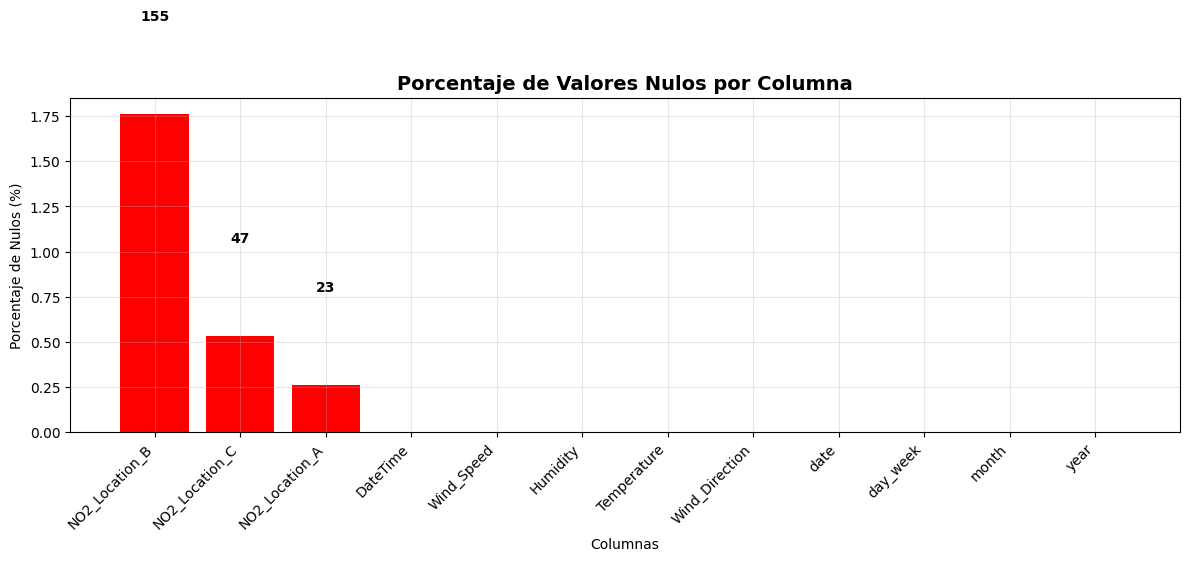


⚠️  COLUMNAS CON VALORES NULOS:
• NO2_Location_B: 155 nulos (1.76%)
• NO2_Location_C: 47 nulos (0.54%)
• NO2_Location_A: 23 nulos (0.26%)


In [16]:
# Ver campos nulos de cada columna
print("🔍 CAMPOS NULOS POR COLUMNA:")
print("=" * 50)

nulos = df.isnull().sum()
nulos_porcentaje = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame con la información
resumen_nulos = pd.DataFrame({
    'Campo': nulos.index,
    'Nulos': nulos.values,
    'Porcentaje': nulos_porcentaje.values
})

# Ordenar de mayor a menor
resumen_nulos = resumen_nulos.sort_values('Nulos', ascending=False)

# Mostrar resultados
print(resumen_nulos.to_string(index=False))

print("\n📊 RESUMEN GENERAL:")
print(f"Total de registros: {len(df)}")
print(f"Columnas con nulos: {len(resumen_nulos[resumen_nulos['Nulos'] > 0])}")
print(f"Columnas sin nulos: {len(resumen_nulos[resumen_nulos['Nulos'] == 0])}")

# Gráfico de nulos
plt.figure(figsize=(12, 6))
bars = plt.bar(resumen_nulos['Campo'], resumen_nulos['Porcentaje'],
               color=['red' if x > 0 else 'green' for x in resumen_nulos['Nulos']])
plt.title('Porcentaje de Valores Nulos por Columna', fontsize=14, fontweight='bold')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Añadir etiquetas con los valores
for bar, nulo in zip(bars, resumen_nulos['Nulos']):
    if nulo > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{nulo}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Versión más detallada para columnas con nulos
if len(resumen_nulos[resumen_nulos['Nulos'] > 0]) > 0:
    print("\n⚠️  COLUMNAS CON VALORES NULOS:")
    print("=" * 40)
    columnas_con_nulos = resumen_nulos[resumen_nulos['Nulos'] > 0]
    for _, row in columnas_con_nulos.iterrows():
        print(f"• {row['Campo']}: {row['Nulos']} nulos ({row['Porcentaje']:.2f}%)")
else:
    print("✅ No hay columnas con valores nulos")

In [17]:
# Analizar registros con múltiples nulos en NO2
print("🔍 ANÁLISIS DE REGISTROS CON MÚLTIPLES NULOS EN NO2:")
print("=" * 50)

# Crear máscaras para cada combinación
mascara_3_nulos = df[['NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']].isna().all(axis=1)
mascara_2_nulos = df[['NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']].isna().sum(axis=1) == 2
mascara_1_nulo = df[['NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']].isna().sum(axis=1) == 1

print(f"Registros con 3 NO2 nulos: {mascara_3_nulos.sum()}")
print(f"Registros con 2 NO2 nulos: {mascara_2_nulos.sum()}")
print(f"Registros con 1 NO2 nulo:  {mascara_1_nulo.sum()}")
print(f"Registros con 0 NO2 nulos: {(~df[['NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']].isna().any(axis=1)).sum()}")

# Ver ejemplos de registros con múltiples nulos
if mascara_3_nulos.any():
    print(f"\n📋 Ejemplo de registros con 3 NO2 nulos:")
    print(df[mascara_3_nulos][['DateTime', 'Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']].head())

if mascara_2_nulos.any():
    print(f"\n📋 Ejemplo de registros con 2 NO2 nulos:")
    print(df[mascara_2_nulos][['DateTime', 'NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']].head())

🔍 ANÁLISIS DE REGISTROS CON MÚLTIPLES NULOS EN NO2:
Registros con 3 NO2 nulos: 0
Registros con 2 NO2 nulos: 7
Registros con 1 NO2 nulo:  211
Registros con 0 NO2 nulos: 8566

📋 Ejemplo de registros con 2 NO2 nulos:
             DateTime  NO2_Location_A  NO2_Location_B  NO2_Location_C
1430  2/29/2020 14:00           15.50             NaN             NaN
1433  2/29/2020 17:00           17.22             NaN             NaN
5802  8/29/2020 18:00           13.35             NaN             NaN
6466  9/26/2020 10:00           10.78             NaN             NaN
6470  9/26/2020 14:00           12.92             NaN             NaN


In [18]:
filas_antes = len(df)
df_limpio = df[~(mascara_2_nulos | mascara_3_nulos)].copy()
filas_eliminadas = filas_antes - len(df_limpio)
print(f"   - Se eliminaron {filas_eliminadas} registros ({filas_eliminadas/filas_antes*100:.2f}%)")


   - Se eliminaron 7 registros (0.08%)


 CAMPOS NULOS POR COLUMNA:
         Campo  Nulos  Porcentaje
NO2_Location_B    148    1.686225
NO2_Location_C     40    0.455737
NO2_Location_A     23    0.262049
      DateTime      0    0.000000
    Wind_Speed      0    0.000000
      Humidity      0    0.000000
   Temperature      0    0.000000
Wind_Direction      0    0.000000
          date      0    0.000000
      day_week      0    0.000000
         month      0    0.000000
          year      0    0.000000

 RESUMEN GENERAL:
Total de registros: 8777
Columnas con nulos: 3
Columnas sin nulos: 9


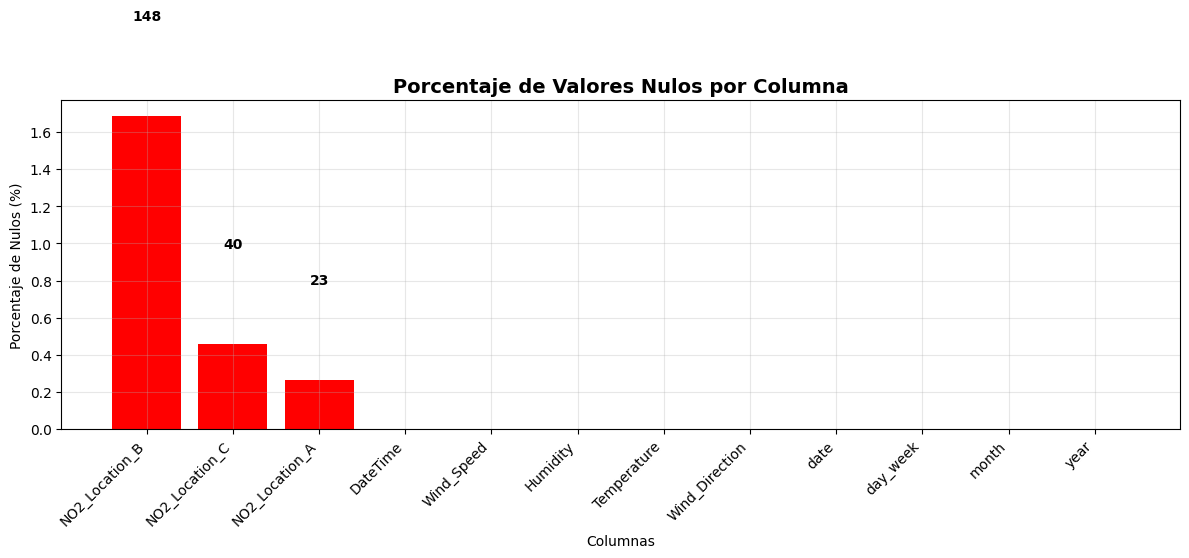


⚠️  COLUMNAS CON VALORES NULOS:
• NO2_Location_B: 148 nulos (1.69%)
• NO2_Location_C: 40 nulos (0.46%)
• NO2_Location_A: 23 nulos (0.26%)


In [19]:
# Ver campos nulos de cada columna
print(" CAMPOS NULOS POR COLUMNA:")
print("=" * 50)

nulos = df_limpio.isnull().sum()
nulos_porcentaje = (df_limpio.isnull().sum() / len(df_limpio)) * 100

# Crear DataFrame con la información
resumen_nulos = pd.DataFrame({
    'Campo': nulos.index,
    'Nulos': nulos.values,
    'Porcentaje': nulos_porcentaje.values
})

# Ordenar de mayor a menor
resumen_nulos = resumen_nulos.sort_values('Nulos', ascending=False)

# Mostrar resultados
print(resumen_nulos.to_string(index=False))

print("\n RESUMEN GENERAL:")
print(f"Total de registros: {len(df_limpio)}")
print(f"Columnas con nulos: {len(resumen_nulos[resumen_nulos['Nulos'] > 0])}")
print(f"Columnas sin nulos: {len(resumen_nulos[resumen_nulos['Nulos'] == 0])}")

# Gráfico de nulos
plt.figure(figsize=(12, 6))
bars = plt.bar(resumen_nulos['Campo'], resumen_nulos['Porcentaje'],
               color=['red' if x > 0 else 'green' for x in resumen_nulos['Nulos']])
plt.title('Porcentaje de Valores Nulos por Columna', fontsize=14, fontweight='bold')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Añadir etiquetas con los valores
for bar, nulo in zip(bars, resumen_nulos['Nulos']):
    if nulo > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{nulo}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Versión más detallada para columnas con nulos
if len(resumen_nulos[resumen_nulos['Nulos'] > 0]) > 0:
    print("\n⚠️  COLUMNAS CON VALORES NULOS:")
    print("=" * 40)
    columnas_con_nulos = resumen_nulos[resumen_nulos['Nulos'] > 0]
    for _, row in columnas_con_nulos.iterrows():
        print(f"• {row['Campo']}: {row['Nulos']} nulos ({row['Porcentaje']:.2f}%)")
else:
    print("No hay columnas con valores nulos")

In [20]:
print("🔍 ANALIZANDO Y RELLENANDO CADA COLUMNA NO2 POR SEPARADO:")
print("=" * 60)

for col in ['NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']:

    print(f"\n PROCESANDO {col}:")
    print("-" * 30)

    data = df_limpio[col].dropna()
    print(f"   Datos disponibles para análisis: {len(data)} registros")

    media = data.mean()
    mediana = data.median()
    sesgo = data.skew()

    print(f"   Media de {col}: {media:.2f}")
    print(f"   Mediana de {col}: {mediana:.2f}")
    print(f"   Sesgo de {col}: {sesgo:.2f}")

    if abs(sesgo) > 1:
        valor_usar = mediana
        metodo = "MEDIANA (alto sesgo)"
    elif abs(sesgo) < 0.5:
        valor_usar = media
        metodo = "MEDIA (datos simétricos)"
    else:
        valor_usar = mediana
        metodo = "MEDIANA (sesgo moderado)"

    print(f"   → Decisión: {metodo}")

    nulos_antes = df_limpio[col].isna().sum()
    if nulos_antes > 0:
        df_limpio[col].fillna(valor_usar, inplace=True)
        print(f"    {nulos_antes} nulos rellenados con: {valor_usar:.2f}")
    else:
        print(f"    {col} ya está completa (0 nulos)")

print(f"\n🎯 RESUMEN FINAL POR COLUMNA:")
for col in ['NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']:
    nulos_despues = df_limpio[col].isna().sum()
    print(f"   {col}: {nulos_despues} nulos restantes")

🔍 ANALIZANDO Y RELLENANDO CADA COLUMNA NO2 POR SEPARADO:

 PROCESANDO NO2_Location_A:
------------------------------
   Datos disponibles para análisis: 8754 registros
   Media de NO2_Location_A: 22.07
   Mediana de NO2_Location_A: 17.65
   Sesgo de NO2_Location_A: 1.35
   → Decisión: MEDIANA (alto sesgo)
    23 nulos rellenados con: 17.65

 PROCESANDO NO2_Location_B:
------------------------------
   Datos disponibles para análisis: 8629 registros
   Media de NO2_Location_B: 29.03
   Mediana de NO2_Location_B: 22.95
   Sesgo de NO2_Location_B: 1.47
   → Decisión: MEDIANA (alto sesgo)
    148 nulos rellenados con: 22.95

 PROCESANDO NO2_Location_C:
------------------------------
   Datos disponibles para análisis: 8737 registros
   Media de NO2_Location_C: 45.40
   Mediana de NO2_Location_C: 40.65
   Sesgo de NO2_Location_C: 0.84
   → Decisión: MEDIANA (sesgo moderado)
    40 nulos rellenados con: 40.65

🎯 RESUMEN FINAL POR COLUMNA:
   NO2_Location_A: 0 nulos restantes
   NO2_Location_

/tmp/ipython-input-1731167698.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(valor_usar, inplace=True)


 CAMPOS NULOS POR COLUMNA:
         Campo  Nulos  Porcentaje
      DateTime      0         0.0
   Temperature      0         0.0
      Humidity      0         0.0
    Wind_Speed      0         0.0
Wind_Direction      0         0.0
NO2_Location_A      0         0.0
NO2_Location_B      0         0.0
NO2_Location_C      0         0.0
          date      0         0.0
      day_week      0         0.0
         month      0         0.0
          year      0         0.0

 RESUMEN GENERAL:
Total de registros: 8777
Columnas con nulos: 0
Columnas sin nulos: 12


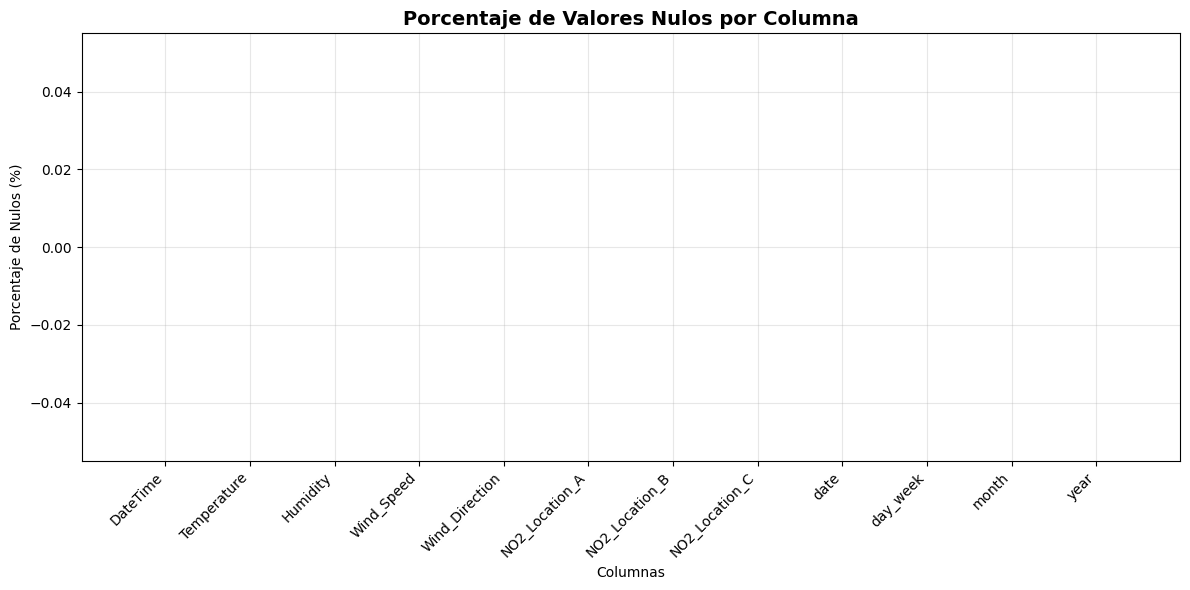

No hay columnas con valores nulos


In [21]:
# Ver campos nulos de cada columna
print(" CAMPOS NULOS POR COLUMNA:")
print("=" * 50)

nulos = df_limpio.isnull().sum()
nulos_porcentaje = (df_limpio.isnull().sum() / len(df_limpio)) * 100

# Crear DataFrame con la información
resumen_nulos = pd.DataFrame({
    'Campo': nulos.index,
    'Nulos': nulos.values,
    'Porcentaje': nulos_porcentaje.values
})

# Ordenar de mayor a menor
resumen_nulos = resumen_nulos.sort_values('Nulos', ascending=False)

# Mostrar resultados
print(resumen_nulos.to_string(index=False))

print("\n RESUMEN GENERAL:")
print(f"Total de registros: {len(df_limpio)}")
print(f"Columnas con nulos: {len(resumen_nulos[resumen_nulos['Nulos'] > 0])}")
print(f"Columnas sin nulos: {len(resumen_nulos[resumen_nulos['Nulos'] == 0])}")

# Gráfico de nulos
plt.figure(figsize=(12, 6))
bars = plt.bar(resumen_nulos['Campo'], resumen_nulos['Porcentaje'],
               color=['red' if x > 0 else 'green' for x in resumen_nulos['Nulos']])
plt.title('Porcentaje de Valores Nulos por Columna', fontsize=14, fontweight='bold')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Añadir etiquetas con los valores
for bar, nulo in zip(bars, resumen_nulos['Nulos']):
    if nulo > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{nulo}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Versión más detallada para columnas con nulos
if len(resumen_nulos[resumen_nulos['Nulos'] > 0]) > 0:
    print("\n⚠️  COLUMNAS CON VALORES NULOS:")
    print("=" * 40)
    columnas_con_nulos = resumen_nulos[resumen_nulos['Nulos'] > 0]
    for _, row in columnas_con_nulos.iterrows():
        print(f"• {row['Campo']}: {row['Nulos']} nulos ({row['Porcentaje']:.2f}%)")
else:
    print("No hay columnas con valores nulos")

4. Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados.


 PRUEBAS DE NORMALIDAD

 VARIABLE: Temperature
   Muestra: 8777 datos | Media: 13.11 | Desv: 7.37
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 26.7733 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8777.
  res = hypotest_fun_out(*samples, **kwds)


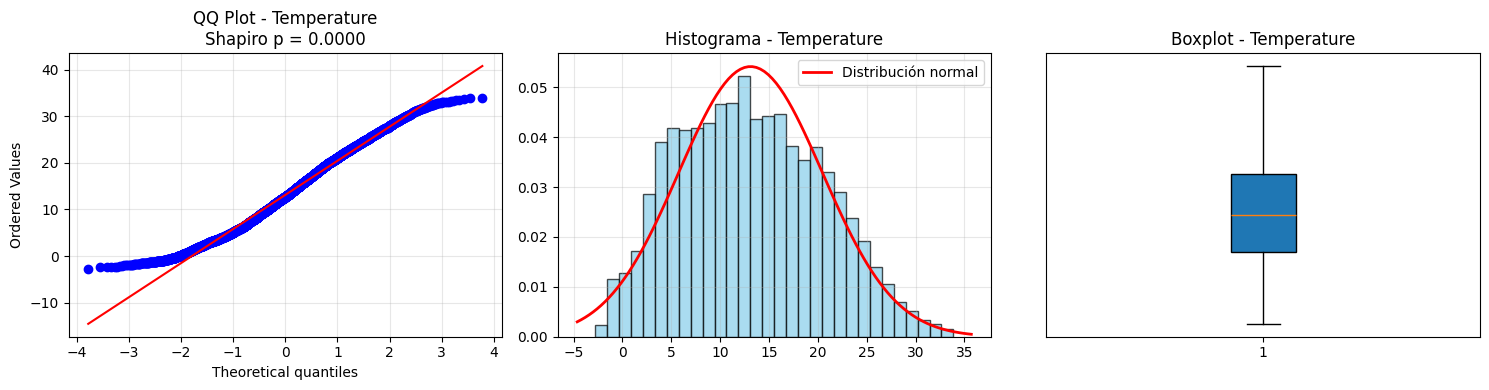


 VARIABLE: Humidity
   Muestra: 8777 datos | Media: 66.68 | Desv: 14.87
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 51.9927 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8777.
  res = hypotest_fun_out(*samples, **kwds)


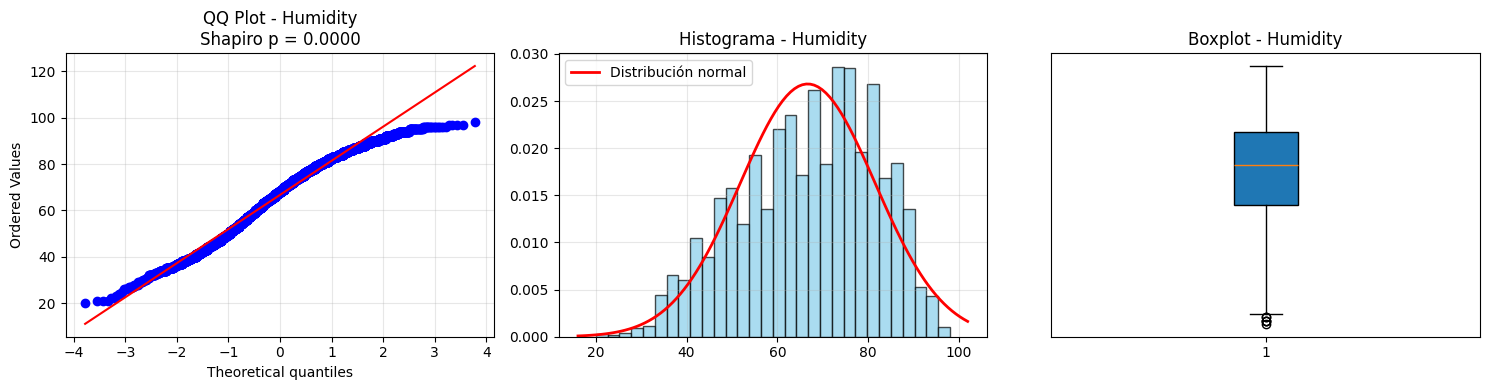


 VARIABLE: Wind_Speed
   Muestra: 8777 datos | Media: 11.26 | Desv: 8.41
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 322.1362 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8777.
  res = hypotest_fun_out(*samples, **kwds)


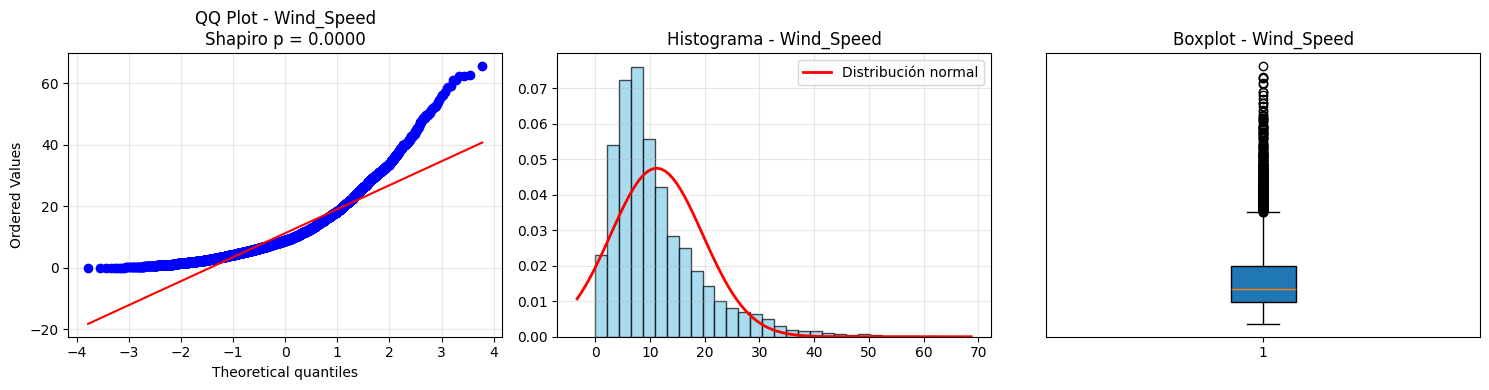


 VARIABLE: Wind_Direction
   Muestra: 8777 datos | Media: 197.56 | Desv: 91.98
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 156.0517 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8777.
  res = hypotest_fun_out(*samples, **kwds)


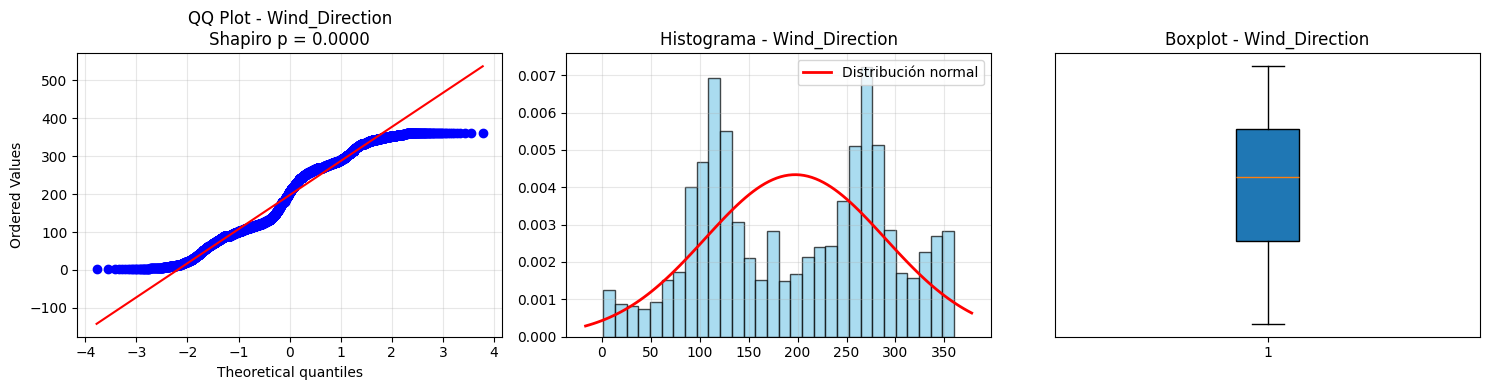


 VARIABLE: NO2_Location_A
   Muestra: 8777 datos | Media: 22.05 | Desv: 15.56
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 290.5787 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8777.
  res = hypotest_fun_out(*samples, **kwds)


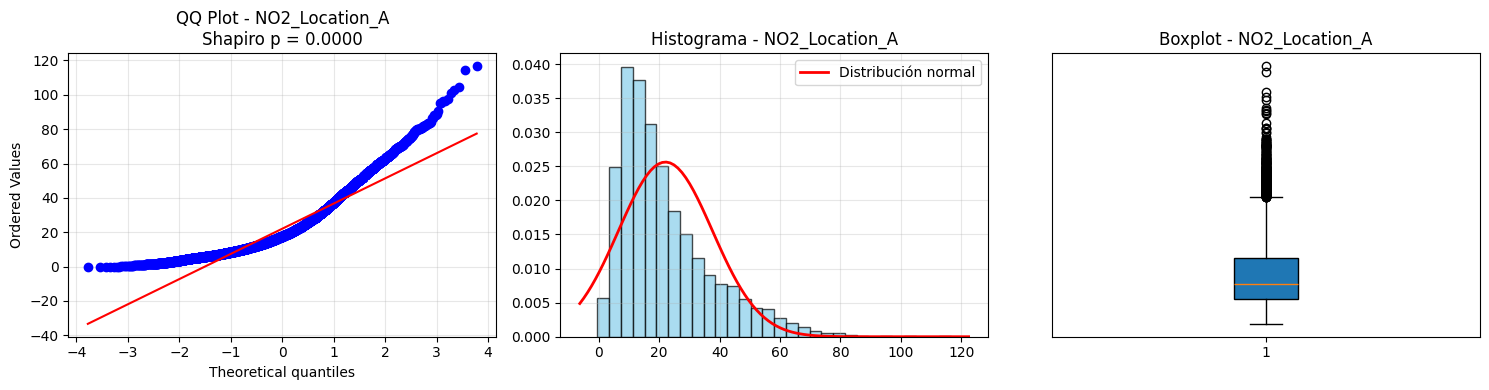


 VARIABLE: NO2_Location_B
   Muestra: 8777 datos | Media: 28.93 | Desv: 20.27
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 324.7523 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8777.
  res = hypotest_fun_out(*samples, **kwds)


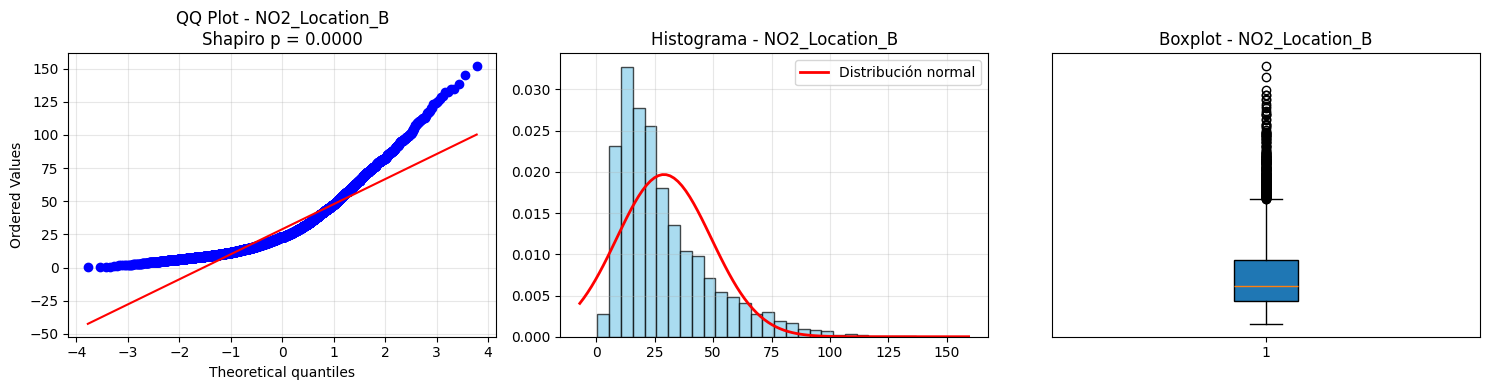


 VARIABLE: NO2_Location_C
   Muestra: 8777 datos | Media: 45.37 | Desv: 26.65
--------------------------------------------------
• Shapiro-Wilk:    p = 0.000000 | ❌ No normal
• Kolmogorov-Smirnov: p = 0.000000 | ❌ No normal
• Anderson-Darling:  stat = 109.2357 | ❌ No normal (stat >= 0.7870)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8777.
  res = hypotest_fun_out(*samples, **kwds)


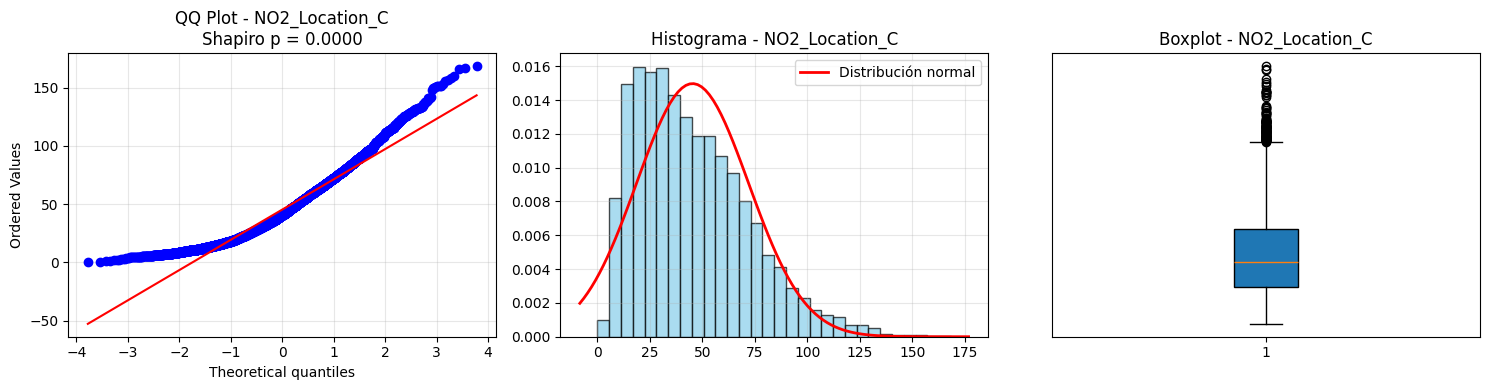


🎯 RESUMEN DE NORMALIDAD:
✅ = Distribución normal (p > 0.05)
❌ = Distribución no normal (p ≤ 0.05)
--------------------------------------------------
❌ Temperature: p = 0.000000
❌ Humidity: p = 0.000000
❌ Wind_Speed: p = 0.000000
❌ Wind_Direction: p = 0.000000
❌ NO2_Location_A: p = 0.000000
❌ NO2_Location_B: p = 0.000000
❌ NO2_Location_C: p = 0.000000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8777.
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
from scipy import stats
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Columnas numéricas para pruebas de normalidad
columnas_numericas = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction',
                     'NO2_Location_A', 'NO2_Location_B', 'NO2_Location_C']

print(" PRUEBAS DE NORMALIDAD")
print("=" * 70)

for columna in columnas_numericas:
    # Limpiar datos (eliminar NaN)
    data = df_limpio[columna].dropna()

    print(f"\n VARIABLE: {columna}")
    print(f"   Muestra: {len(data)} datos | Media: {data.mean():.2f} | Desv: {data.std():.2f}")
    print("-" * 50)

    # 1. Shapiro-Wilk (mejor para muestras < 5000)
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"• Shapiro-Wilk:    p = {shapiro_p:.6f} | {'✅ Normal' if shapiro_p > 0.05 else '❌ No normal'}")

    # 2. Kolmogorov-Smirnov
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"• Kolmogorov-Smirnov: p = {ks_p:.6f} | {'✅ Normal' if ks_p > 0.05 else '❌ No normal'}")

    # 3. Anderson-Darling (más sensible a colas)
    anderson_result = stats.anderson(data, dist='norm')
    print(f"• Anderson-Darling:  stat = {anderson_result.statistic:.4f} | ", end='')

    # Comparar con valor crítico al 5%
    critical_5 = anderson_result.critical_values[2]  # Valor crítico al 5%
    if anderson_result.statistic < critical_5:
        print(f"✅ Normal (stat < {critical_5:.4f})")
    else:
        print(f"❌ No normal (stat >= {critical_5:.4f})")

    # Crear gráficos de diagnóstico
    plt.figure(figsize=(15, 4))

    # Subplot 1: QQ Plot
    plt.subplot(1, 3, 1)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot - {columna}\nShapiro p = {shapiro_p:.4f}')
    plt.grid(True, alpha=0.3)

    # Subplot 2: Histograma + curva normal
    plt.subplot(1, 3, 2)
    plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data.mean(), data.std())
    plt.plot(x, p, 'r-', linewidth=2, label='Distribución normal')
    plt.title(f'Histograma - {columna}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Subplot 3: Boxplot para ver outliers
    plt.subplot(1, 3, 3)
    plt.boxplot(data, patch_artist=True)
    plt.gca().get_yaxis().set_visible(False)  # Ocultar eje Y
    plt.title(f'Boxplot - {columna}')

    plt.tight_layout()
    plt.show()

    print("=" * 70)

# Resumen final
print("\n🎯 RESUMEN DE NORMALIDAD:")
print("✅ = Distribución normal (p > 0.05)")
print("❌ = Distribución no normal (p ≤ 0.05)")
print("-" * 50)

for columna in columnas_numericas:
    data = df_limpio[columna].dropna()
    shapiro_stat, shapiro_p = stats.shapiro(data)
    es_normal = "✅" if shapiro_p > 0.05 else "❌"
    print(f"{es_normal} {columna}: p = {shapiro_p:.6f}")


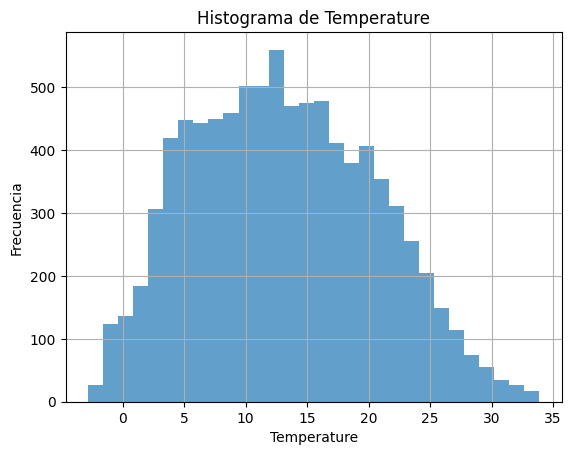

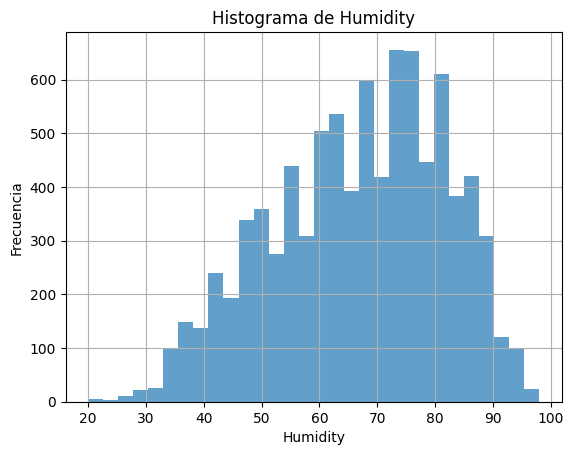

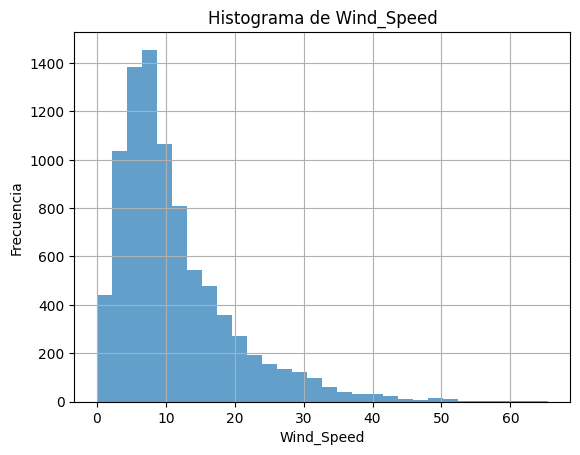

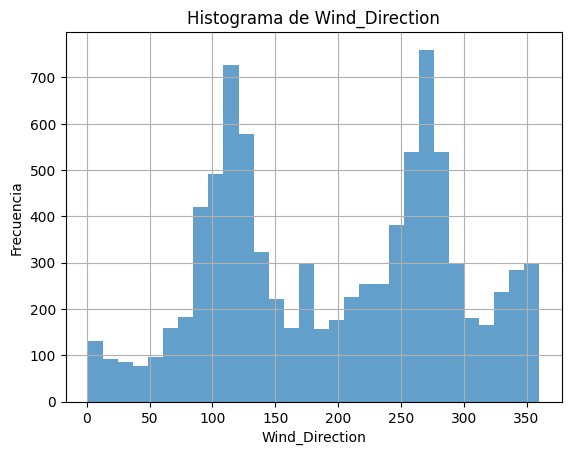

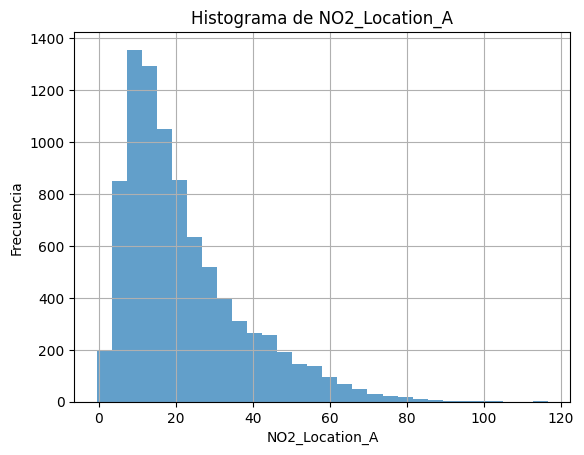

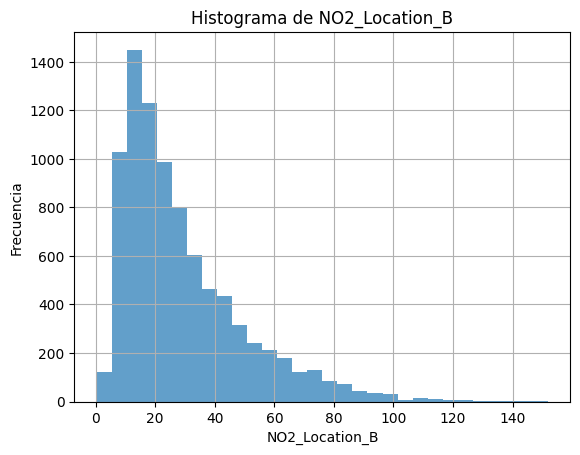

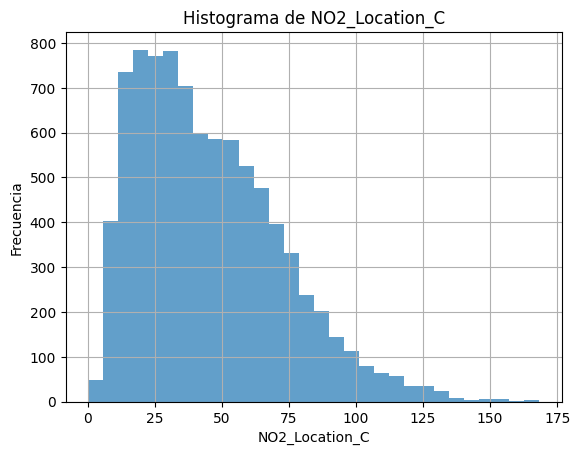

In [23]:
import matplotlib.pyplot as plt

columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for columna in columnas_numericas:
    df[columna].hist(bins=30, alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

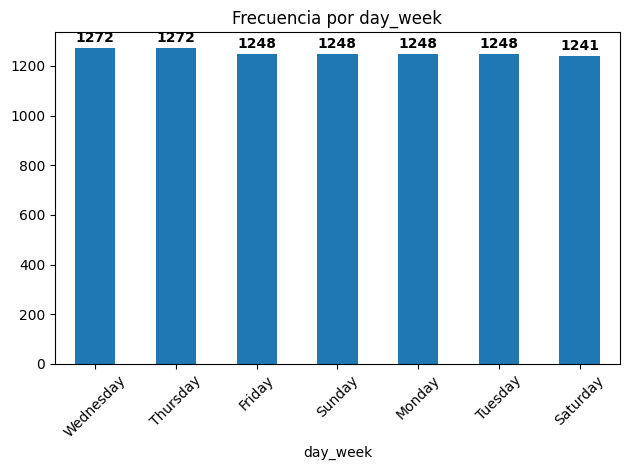

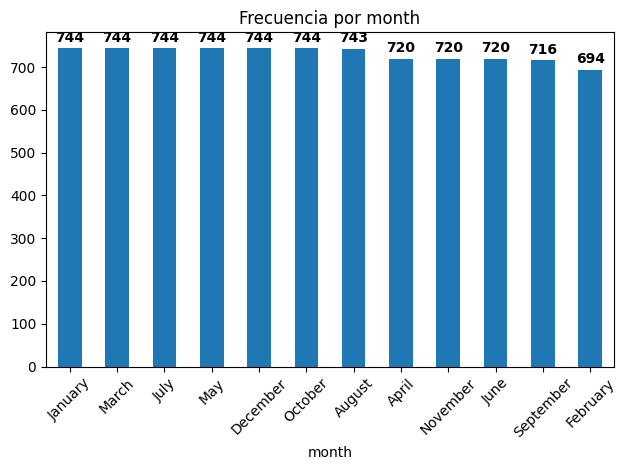

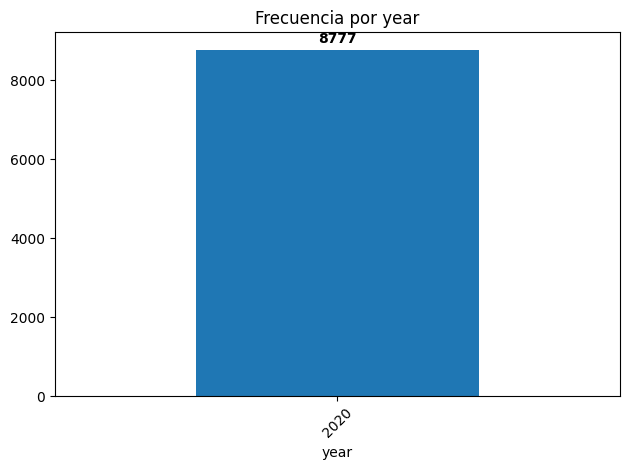

In [24]:
for columna in ['day_week', 'month', 'year']:
    counts = df_limpio[columna].value_counts()
    ax = counts.plot(kind='bar')
    plt.title(f'Frecuencia por {columna}')
    plt.xticks(rotation=45)

    # Añadir las cantidades en las barras
    for i, v in enumerate(counts):
        ax.text(i, v + 0.01 * counts.max(), str(v),
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()


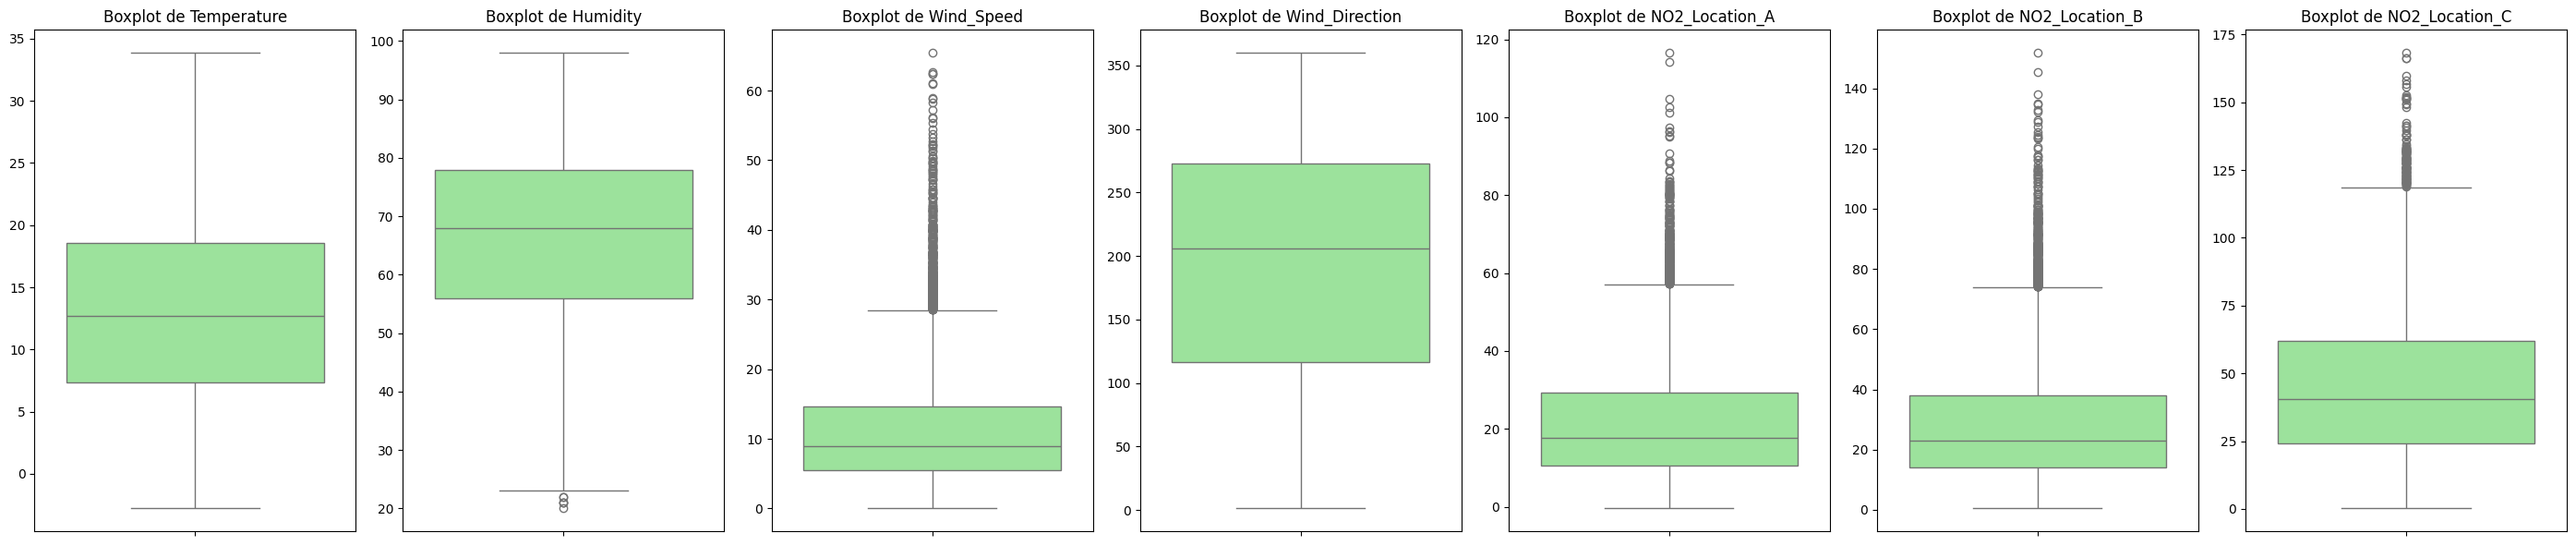

In [25]:
fig, axes = plt.subplots(1, len(columnas_numericas), figsize=(4*len(columnas_numericas), 6))

if len(columnas_numericas) == 1:
    axes = [axes]

for i, columna in enumerate(columnas_numericas):
    sns.boxplot(y=df_limpio[columna], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Matriz de Correlación:
                Temperature  Humidity  Wind_Speed  Wind_Direction  \
Temperature           1.000    -0.514      -0.144           0.017   
Humidity             -0.514     1.000      -0.033           0.095   
Wind_Speed           -0.144    -0.033       1.000           0.210   
Wind_Direction        0.017     0.095       0.210           1.000   
NO2_Location_A       -0.147     0.048       0.013          -0.006   
NO2_Location_B       -0.170     0.027       0.076           0.047   
NO2_Location_C       -0.026    -0.067       0.022          -0.018   

                NO2_Location_A  NO2_Location_B  NO2_Location_C  
Temperature             -0.147          -0.170          -0.026  
Humidity                 0.048           0.027          -0.067  
Wind_Speed               0.013           0.076           0.022  
Wind_Direction          -0.006           0.047          -0.018  
NO2_Location_A           1.000           0.787           0.605  
NO2_Location_B           0.787    

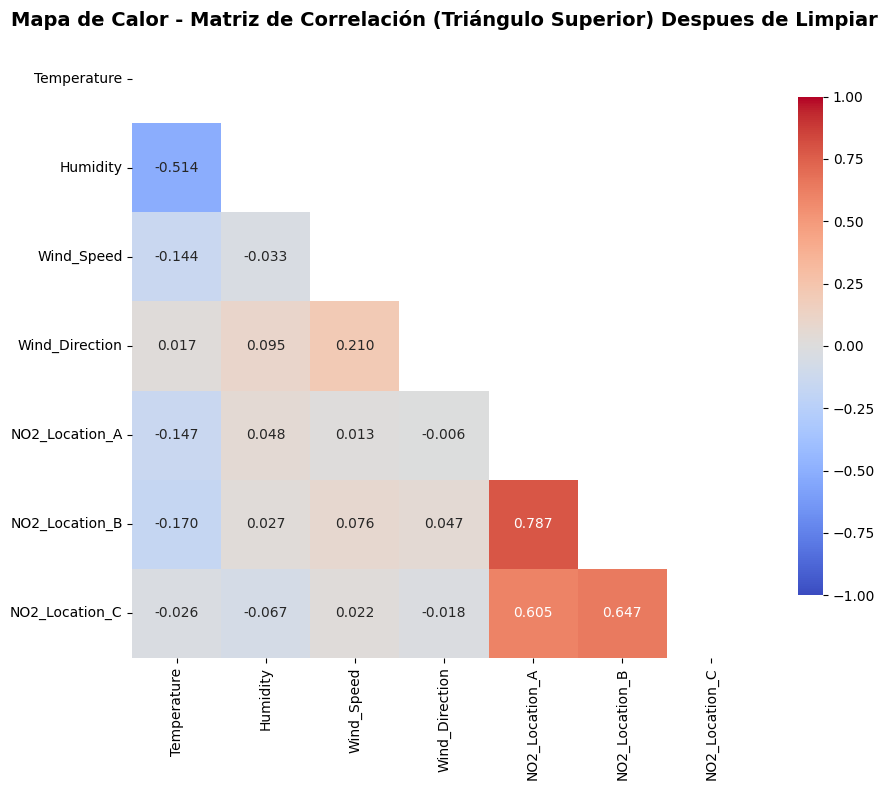

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_limpio[columnas_numericas].corr()

print("Matriz de Correlación:")
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            fmt='.3f',
            mask=mask,
            cbar_kws={'shrink': 0.8})

plt.title('Mapa de Calor - Matriz de Correlación (Triángulo Superior) Despues de Limpiar', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


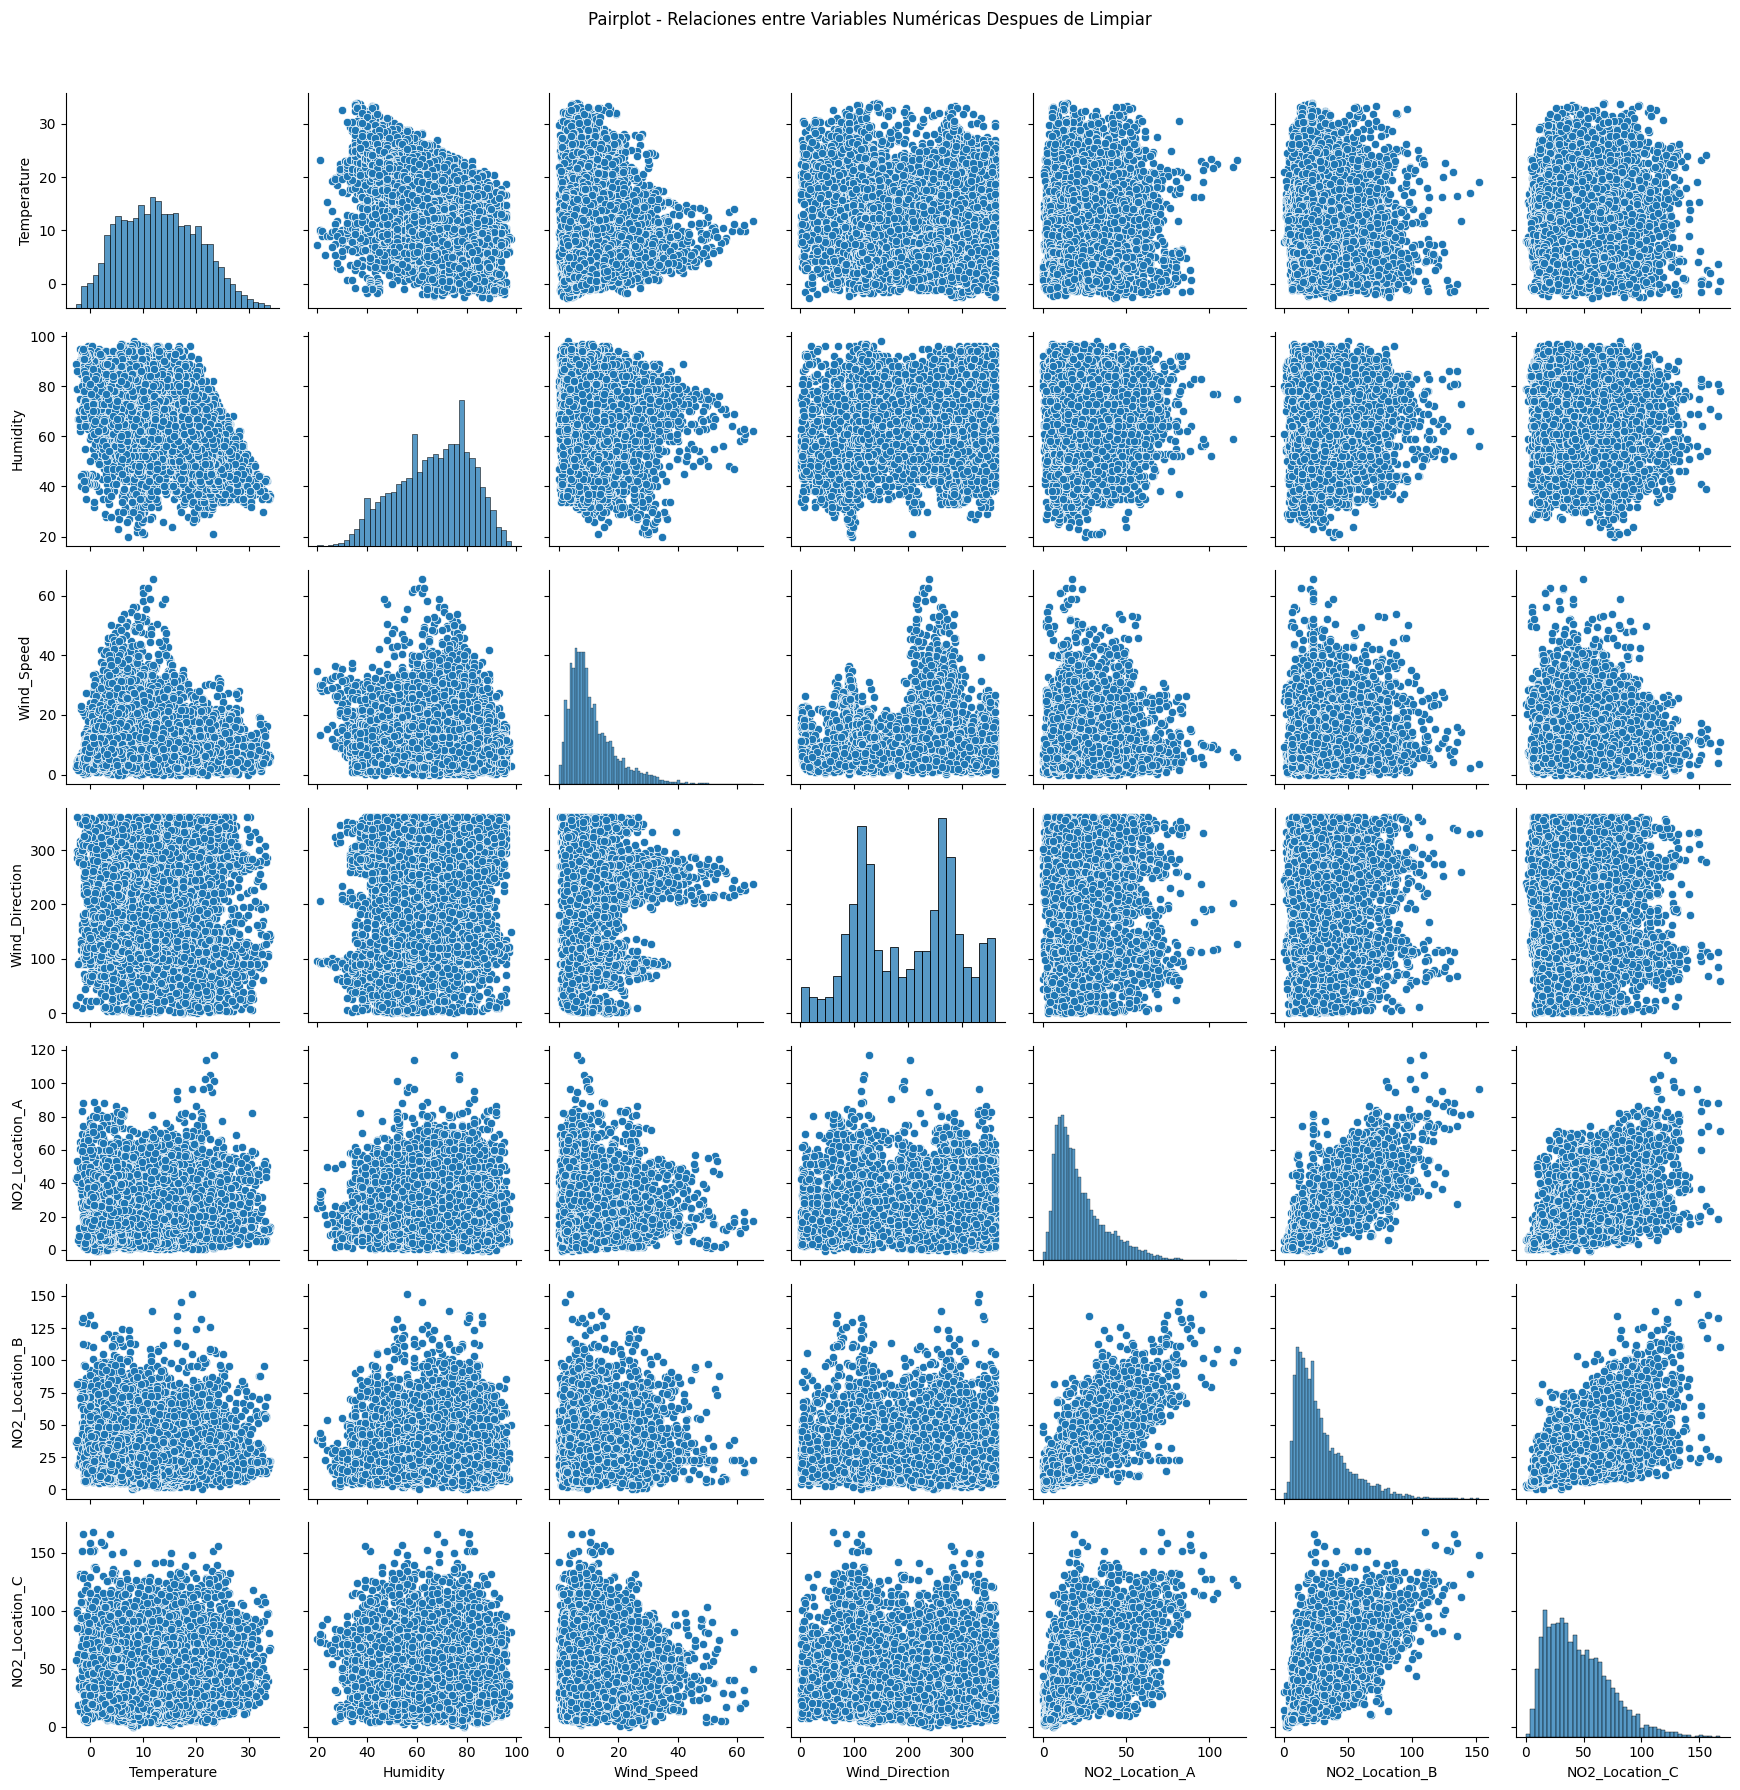

In [27]:
sns.pairplot(df_limpio[columnas_numericas])
plt.suptitle('Pairplot - Relaciones entre Variables Numéricas Despues de Limpiar', y=1.02)
plt.tight_layout()
plt.show()
